<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/03%20-%20Train%20Models/03%20-%20Train%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (20,5)

# 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

# 02 - Import data from Quix

In [3]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoidGhldmFsbGV5dGVhbTIiLCJodHRwczovL3F1aXguYWkvb3duZXJfaWQiOiJhdXRoMHxlMTQzMzYxYS1iOWI0LTRlMDYtOTA4Zi0wYWU0NzUyZDk4ZTYiLCJodHRwczovL3F1aXguYWkvdG9rZW5faWQiOiJkYTc2YmQxZS03MzI0LTQ1YTMtYjdhMi1mNGNlZThjMWQ1NDciLCJodHRwczovL3F1aXguYWkvZXhwIjoiMTcxMTU4MDQwMCIsImh0dHBzOi8vcXVpeC5haS9yb2xlcyI6ImFkbWluIiwiaXNzIjoiaHR0cHM6Ly9hdXRoLnF1aXguYWkvIiwic3ViIjoiQjZkM2kwczFBR2tIZVlmNmQ5QkFMQzZmaUtTWkpZcUpAY2xpZW50cyIsImF1ZCI6InF1aXgiLCJpYXQiOjE2NDc4Njg1MjYsImV4cCI6MTY1MDQ2MDUyNiwiYXpwIjoiQjZkM2kwczFBR2tIZVlmNmQ5QkFMQzZmaUtTWkpZcUoiLCJndHkiOiJjbGllbnQtY3JlZGVudGlhbHMiLCJwZXJtaXNzaW9ucyI6W119.se1Snxvne-cH8ZFR6qcKbKMHuyyOtCJOc6AfNeL_1R2TF5noeXU86XfY9cusBZiMYh3LRrUj4XWR9p9ilQk-uMYDsOyC_FBPhM2JqM0bLsnm3S8DWzC6XrAPzdZOUuIONQRFQQSgX_DW9k2d4qDHC3VZHI6mTDiRJa83JSRvGmSV1j3PAB3VVviLlIuNUA3uNwY5OK4W3uFDdrGhIN25PLGbnIlwAcpz9mm16VBKd3w8qhgHmoEq6gkmqE6TaEv6McSaOT23TRd4ZrTN_sX7udCks8p_Wuig-4YOG2H5HLd5_yDuL3-cycaIpX8iuDExx1LZAgVCv6Inh5nyVbuqHA"

In [4]:
def datetime_to_timestamp(datetime_i):    
    # calculate unix datetime
    unix_di = (datetime_i - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    unix_di = unix_di * 10**9
    return int(unix_di)

In [5]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-thevalleyteam2-team2.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'from': datetime_to_timestamp(pd.to_datetime("2022/03/18")), 
    'to': datetime_to_timestamp(pd.Timestamp.now()),
    'numericParameters': [
        {'parameterName': 'BTC', 'aggregationType': 'None'},
        {'parameterName': 'ETH', 'aggregationType': 'None'},
        {'parameterName': 'BNB', 'aggregationType': 'None'},
        {'parameterName': 'LUNA', 'aggregationType': 'None'},
        {'parameterName': 'XRP', 'aggregationType': 'None'},
        {'parameterName': 'ADA', 'aggregationType': 'None'},
        {'parameterName': 'SOL', 'aggregationType': 'None'},
        {'parameterName': 'AVAX', 'aggregationType': 'None'},
        {'parameterName': 'DOT', 'aggregationType': 'None'},
        {'parameterName': 'DOGE', 'aggregationType': 'None'},
        {'parameterName': 'BTC_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ETH_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'BNB_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'LUNA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'XRP_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ADA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'SOL_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'AVAX_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'DOT_VOL24','aggregationType': 'None'},
        {'parameterName': 'DOGE_VOL24', 'aggregationType': 'None'}
        ],
    'streamIds': ['1-in-messari']
}

response = requests.post(url, headers=head, json=payload)
print(response)
df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df

<Response [200]>


Timestamp           BTC          ETH         BNB  \
0    2022-03-18 09:12:15.110928896  40562.502806  2802.987669  388.140788   
1    2022-03-18 09:13:00.270377984  40583.687504  2804.922288  388.338231   
2    2022-03-18 09:13:45.859963904  40611.304212  2806.689941  388.547326   
3    2022-03-18 09:14:31.348481024  40606.329778  2805.895573  388.306381   
4    2022-03-18 09:15:16.809017088  40595.767063  2804.590455  387.775904   
...                            ...           ...          ...         ...   
7381 2022-03-25 16:15:58.205585920  44526.219778  3131.960871  413.574143   
7382 2022-03-25 16:16:43.691353088  44560.641205  3134.278949  414.512934   
7383 2022-03-25 16:17:29.141027072  44540.531377  3131.989944  414.035806   
7384 2022-03-25 16:18:14.588434944  44537.981575  3131.069744  414.131068   
7385 2022-03-25 16:19:00.062204928  44548.155736  3130.409909  413.995947   

           LUNA       XRP       ADA         SOL       AVAX        DOT  ...  \
0     83.733926  0.785357  0.826800   85.981692  79.523496  18.534105  ...   
1     83.851798  0.785380  0.827562   86.080177  79.598082  18.539256  ...   
2     83.779711  0.785976  0.828469   86.110814  79.681909  18.554438  ...   
3     83.703316  0.785923  0.828606   86.130701  79.706022  18.551656  ...   
4     83.568593  0.785670  0.828253   86.057763  79.661488  18.537685  ...   
...         ...       ...       ...         ...        ...        ...  ...   
7381  93.228841  0.834673  1.106790  100.659959  85.034226  20.780276  ...   
7382  93.258725  0.835215  1.107487  100.754671  85.079787  20.794496  ...   
7383  93.111662  0.834713  1.105371  100.591818  84.921096  20.773030  ...   
7384  93.035892  0.834768  1.105358  100.652740  84.941957  20.781252  ...   
7385  93.062117  0.834583  1.103846  100.669529  84.878270  20.783010  ...   

         BTC_VOL24     ETH_VOL24     BNB_VOL24    LUNA_VOL24     XRP_VOL24  \
0     3.649734e+09  3.595527e+09  3.372194e+08  7.022888e+08  3.444767e+08   
1     3.652427e+09  3.599659e+09  3.375114e+08  7.044553e+08  3.448428e+08   
2     3.656180e+09  3.603109e+09  3.377570e+08  7.049046e+08  3.452795e+08   
3     3.657199e+09  3.603085e+09  3.376489e+08  7.045997e+08  3.453480e+08   
4     3.657190e+09  3.602163e+09  3.380655e+08  7.040654e+08  3.455498e+08   
...            ...           ...           ...           ...           ...   
7381  6.045757e+09  4.330279e+09  3.908202e+08  5.788466e+08  3.941180e+08   
7382  6.054972e+09  4.335654e+09  3.951895e+08  5.791931e+08  3.946419e+08   
7383  6.056364e+09  4.334549e+09  3.951965e+08  5.788971e+08  3.945343e+08   
7384  6.060399e+09  4.335571e+09  3.955597e+08  5.786499e+08  3.947309e+08   
7385  6.066982e+09  4.336365e+09  3.956477e+08  5.791346e+08  3.948239e+08   

         ADA_VOL24     SOL_VOL24    AVAX_VOL24     DOT_VOL24    DOGE_VOL24  
0     1.808038e+08  6.483335e+08  6.531873e+08  1.851182e+08  1.145830e+08  
1     1.811499e+08  6.491953e+08  6.538639e+08  1.852039e+08  1.146576e+08  
2     1.814764e+08  6.495003e+08  6.546222e+08  1.855197e+08  1.146822e+08  
3     1.815424e+08  6.497079e+08  6.549620e+08  1.855050e+08  1.146799e+08  
4     1.815326e+08  6.492444e+08  6.547395e+08  1.854564e+08  1.147477e+08  
...            ...           ...           ...           ...           ...  
7381  8.902969e+08  9.561661e+08  4.582739e+08  2.933101e+08  3.281315e+08  
7382  8.913396e+08  9.575523e+08  4.588526e+08  2.936801e+08  3.287127e+08  
7383  8.899984e+08  9.565106e+08  4.584040e+08  2.935371e+08  3.285135e+08  
7384  8.905082e+08  9.574157e+08  4.586704e+08  2.936871e+08  3.286035e+08  
7385  8.900039e+08  9.580115e+08  4.585018e+08  2.937826e+08  3.287007e+08  

[7386 rows x 21 columns]

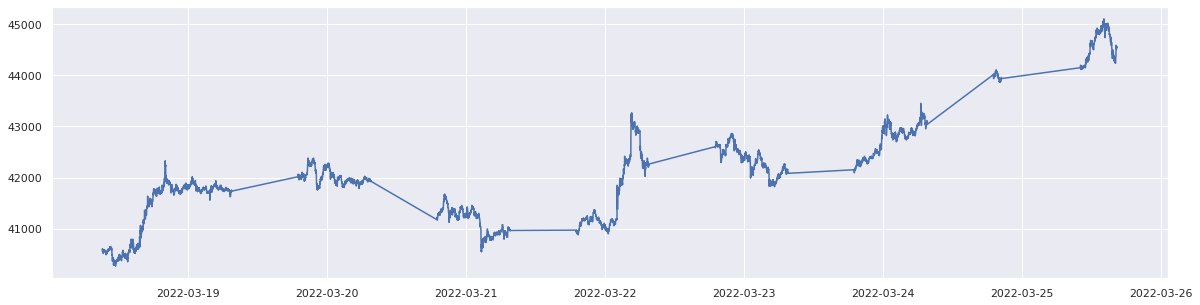

In [6]:
# Example Bitcoin
plt.plot(df['Timestamp'], df['BTC'])
plt.show()

# 03 - Prepare data

In [7]:
def prepare_data(df):
  price_cols = [col for col in df.columns[1:] if "_VOL24" not in col]
  vol_cols = [col for col in df.columns[1:] if "_VOL24" in col]
  
  # Ensure we have data with equally separated intervals
  df = df.set_index('Timestamp').resample('45s').mean().dropna()

  # Stack
  df_prices = df[price_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
  df_vol = df[vol_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Vol24h'})
  df_vol['Crypto'] = [crypto_i.split("_")[0] for crypto_i in df_vol['Crypto']]

  # Get both prices and volumes together
  df = pd.merge(df_prices, df_vol, how='left', on=['Timestamp', 'Crypto']).reset_index(drop=True)
  del df_prices, df_vol 

  return df

In [8]:
df = prepare_data(df)
df

Timestamp Crypto         Price        Vol24h
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08
...                   ...    ...           ...           ...
73825 2022-03-25 16:18:45    ADA      1.103846  8.900039e+08
73826 2022-03-25 16:18:45    SOL    100.669529  9.580115e+08
73827 2022-03-25 16:18:45   AVAX     84.878270  4.585018e+08
73828 2022-03-25 16:18:45    DOT     20.783010  2.937826e+08
73829 2022-03-25 16:18:45   DOGE      0.132553  3.287007e+08

[73830 rows x 4 columns]

# 04 - Create Variables

In [9]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['BTC', 'ETH', 'BNB', 'LUNA', 'XRP', 'ADA', 'SOL', 'AVAX', 'DOT', 'DOGE']

In [10]:
# Install talib (can take 2-3 min)
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2022-03-25 16:20:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-25 16:20:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-25 16:20:03--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [11]:
import talib

## 04_01 - Trend Variables
Owner: Cristina https://github.com/CCienfu

### 04_01_01 - SMA 

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

Pongo de ejemplo perido 10 y 50 pero habria que escoger los mejores para modelo predictivo

In [12]:
# Using TA-LIB
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'SMA10'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'SMA50'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'SMA100'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100  
73825    1.100861    1.106056  
73826  100.275545  100.762181  
73827   84.744609   84.984337  
73828   20.687584   20.761145  
73829    0.132288    0.133039

### 04_01_02 - EMA
A simple moving average can be enhanced as an exponential moving average (EMA) that is more heavily weighted on recent price action.

The major difference between an exponential moving average (EMA) and a simple moving average is the sensitivity each one shows to changes in the data used in its calculation. More specifically, the EMA gives a higher weighting to recent prices, while the SMA assigns an equal weighting to all values.

In [13]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'EMA10'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'EMA50'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'EMA100'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  
73825    1.100861    1.106056    1.105153    1.103148    1.107051  
73826  100.275545  100.762181  100.611398  100.475685  100.865916  
73827   84.744609   84.984337   84.948535   84.847462   85.079393  
73828   20.687584   20.761145   20.764759   20.721402   20.773447  
73829    0.132288    0.133039    0.132500    0.132484    0.133036

### 04_01_03 - Plot

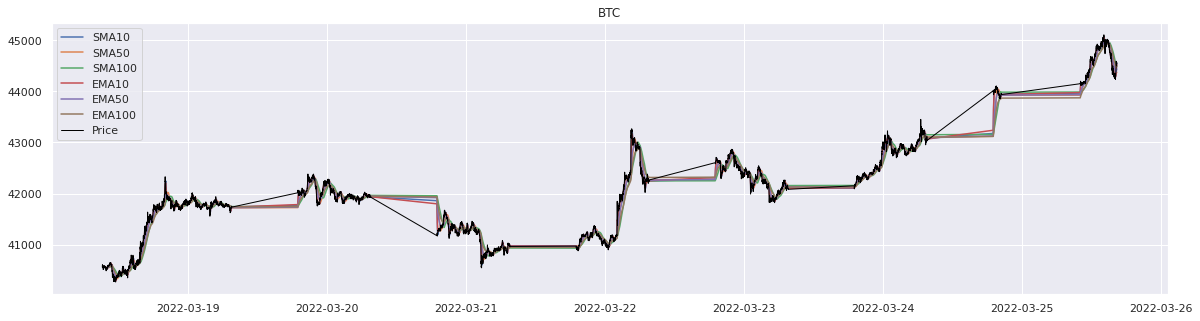

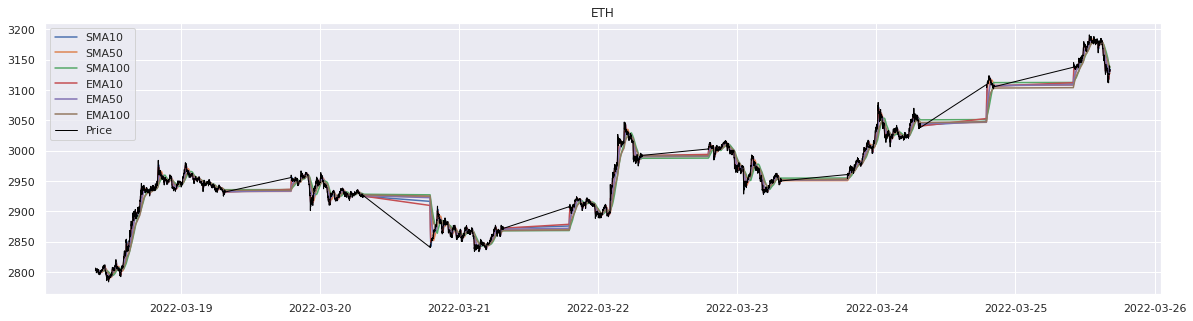

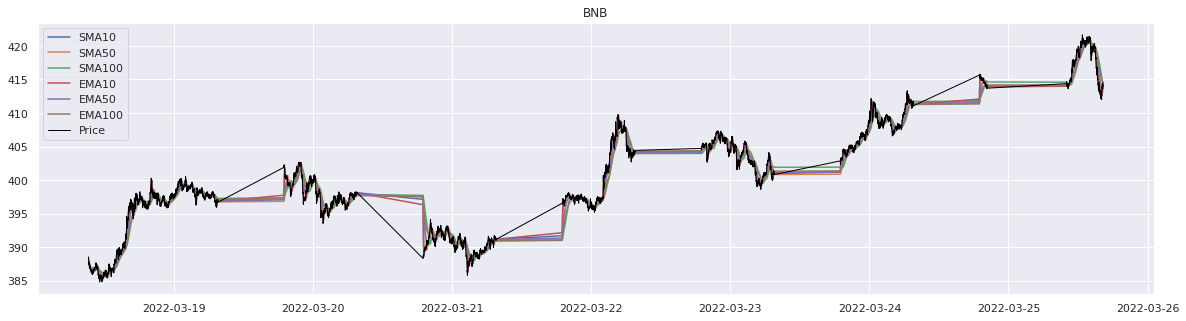

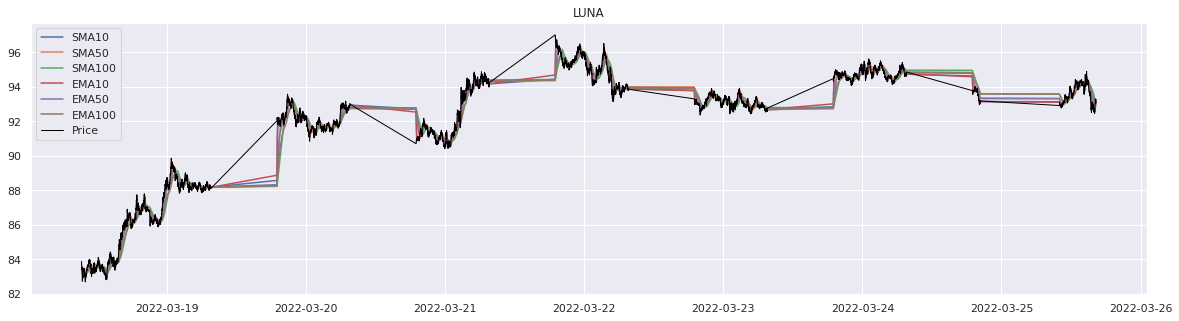

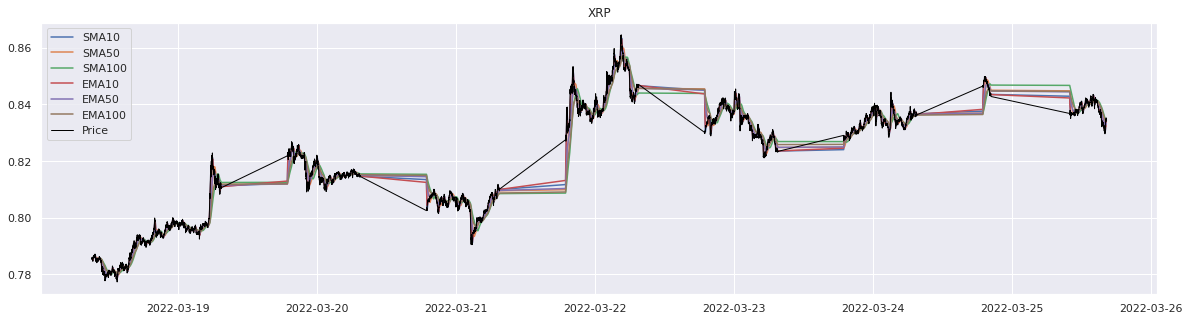

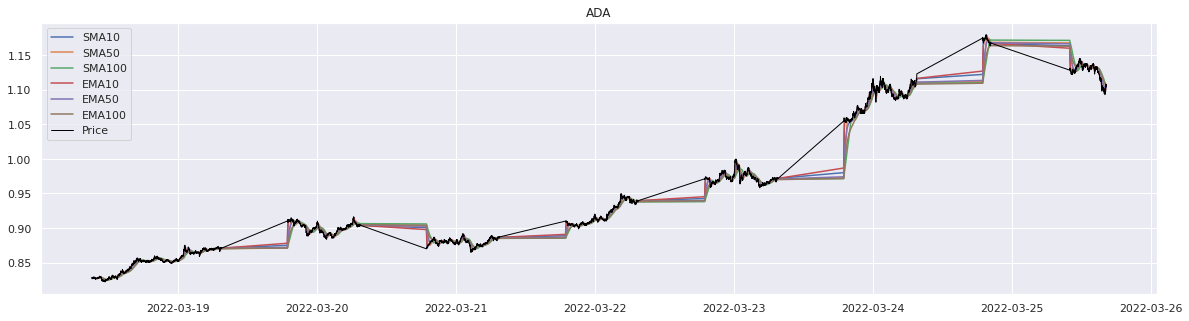

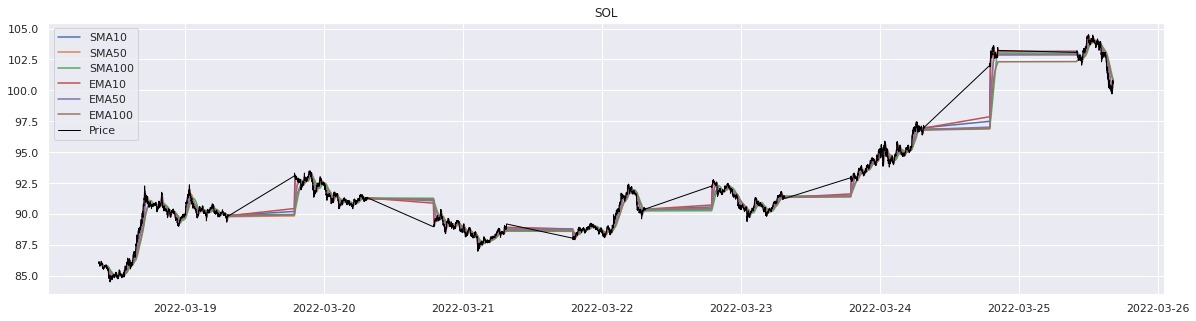

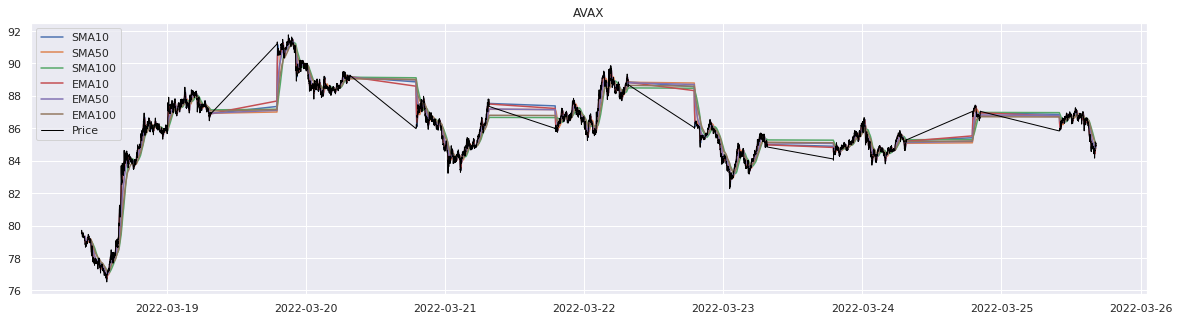

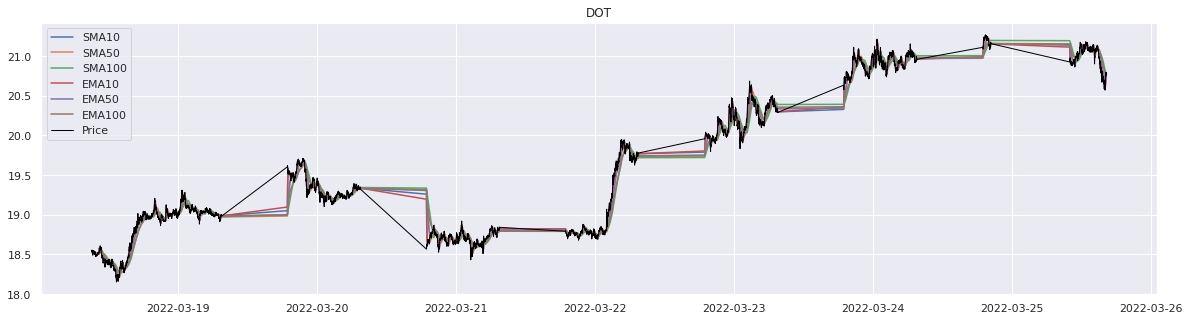

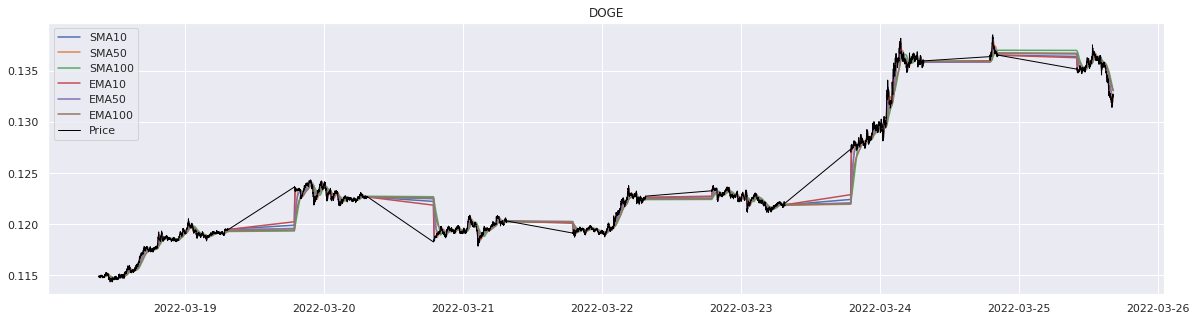

In [14]:
sma_cols = [col for col in df.columns if "SMA" in col]
ema_cols = [col for col in df.columns if "EMA" in col]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  for col in sma_cols + ema_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], linewidth=1, color='black', label='Price')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_02 - Volume Variables
Owners: 
- Álvaro Cascón https://github.com/alvarocascon
- Álvaro Forner https://github.com/alvaroforner

### 04_02_01 - Delta Volume
Create a variable that takes evolution of Vol24h into account to assess latest volume changes (over last 7.5 mins).

In [15]:
# Create DeltaVol24h
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'Vol24h'] - df.loc[filter_crypto_i, 'Vol24h'].shift(1)
    df.loc[((filter_crypto_i)&(df['DeltaVol24h']<0)), 'DeltaVol24h'] = np.NaN
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(10, min_periods=1).median()

df.tail(20)

Timestamp Crypto         Price        Vol24h         SMA10  \
73810 2022-03-25 16:18:00    BTC  44537.981575  6.060399e+09  44537.853672   
73811 2022-03-25 16:18:00    ETH   3131.069744  4.335571e+09   3134.181266   
73812 2022-03-25 16:18:00    BNB    414.131068  3.955597e+08    413.982332   
73813 2022-03-25 16:18:00   LUNA     93.035892  5.786499e+08     93.211516   
73814 2022-03-25 16:18:00    XRP      0.834768  3.947309e+08      0.834497   
73815 2022-03-25 16:18:00    ADA      1.105358  8.905082e+08      1.106540   
73816 2022-03-25 16:18:00    SOL    100.652740  9.574157e+08    100.668613   
73817 2022-03-25 16:18:00   AVAX     84.941957  4.586704e+08     85.047182   
73818 2022-03-25 16:18:00    DOT     20.781252  2.936871e+08     20.772490   
73819 2022-03-25 16:18:00   DOGE      0.132541  3.286035e+08      0.132539   
73820 2022-03-25 16:18:45    BTC  44548.155736  6.066982e+09  44537.895614   
73821 2022-03-25 16:18:45    ETH   3130.409909  4.336365e+09   3133.704534   
73822 2022-03-25 16:18:45    BNB    413.995947  3.956477e+08    413.964254   
73823 2022-03-25 16:18:45   LUNA     93.062117  5.791346e+08     93.191640   
73824 2022-03-25 16:18:45    XRP      0.834583  3.948239e+08      0.834506   
73825 2022-03-25 16:18:45    ADA      1.103846  8.900039e+08      1.106109   
73826 2022-03-25 16:18:45    SOL    100.669529  9.580115e+08    100.655709   
73827 2022-03-25 16:18:45   AVAX     84.878270  4.585018e+08     85.023731   
73828 2022-03-25 16:18:45    DOT     20.783010  2.937826e+08     20.774093   
73829 2022-03-25 16:18:45   DOGE      0.132553  3.287007e+08      0.132529   

              SMA50        SMA100         EMA10         EMA50        EMA100  \
73810  44365.886772  44479.732738  44512.579795  44427.713685  44496.141191   
73811   3127.552014   3137.062139   3131.995424   3130.277143   3138.018772   
73812    413.171569    414.407011    413.888567    413.630474    414.582014   
73813     92.863947     93.087604     93.136103     92.975366     93.143279   
73814      0.832432      0.834076      0.834252      0.833143      0.834250   
73815      1.100819      1.106242      1.105444      1.103119      1.107115   
73816    100.264860    100.781657    100.598480    100.467773    100.869884   
73817     84.746175     84.996170     84.964149     84.846205     85.083456   
73818     20.685693     20.763127     20.760703     20.718887     20.773254   
73819      0.132285      0.133062      0.132488      0.132481      0.133046   
73820  44369.155046  44477.360779  44519.048148  44432.436903  44497.171182   
73821   3127.494059   3136.679603   3131.707149   3130.282350   3137.868101   
73822    413.185640    414.366403    413.908090    413.644806    414.570409   
73823     92.866853     93.078832     93.122651     92.978768     93.141672   
73824      0.832467      0.834049      0.834312      0.833199      0.834257   
73825      1.100861      1.106056      1.105153      1.103148      1.107051   
73826    100.275545    100.762181    100.611398    100.475685    100.865916   
73827     84.744609     84.984337     84.948535     84.847462     85.079393   
73828     20.687584     20.761145     20.764759     20.721402     20.773447   
73829      0.132288      0.133039      0.132500      0.132484      0.133036   

        DeltaVol24h  
73810  4.068712e+06  
73811  4.621509e+06  
73812  3.631551e+05  
73813  3.641021e+05  
73814  3.798016e+05  
73815  1.158739e+06  
73816  1.006150e+06  
73817  4.652649e+05  
73818  3.236970e+05  
73819  2.084720e+05  
73820  4.068712e+06  
73821  3.315004e+06  
73822  2.973873e+05  
73823  3.641021e+05  
73824  3.111406e+05  
73825  1.100721e+06  
73826  9.051129e+05  
73827  3.518652e+05  
73828  2.749422e+05  
73829  2.038144e+05

### 04_02_02 Volume Trend and Momentum

In [16]:
# Example
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'DeltaVol>EMA20'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>talib.EMA(df.loc[filter_crypto_i, 'DeltaVol24h'], 20)).astype(int)
  df.loc[filter_crypto_i, 'DeltaVol>90roll200'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(200,min_periods=1).quantile(0.90)).astype(int)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200  
73825  1.100721e+06             0.0                 0.0  
73826  9.051129e+05             0.0                 0.0  
73827  3.518652e+05             0.0                 0.0  
73828  2.749422e+05             0.0                 0.0  
73829  2.038144e+05             0.0                 0.0

### 04_02_03 - Plot
Compare volumen last 24h versus the delta variable we create.

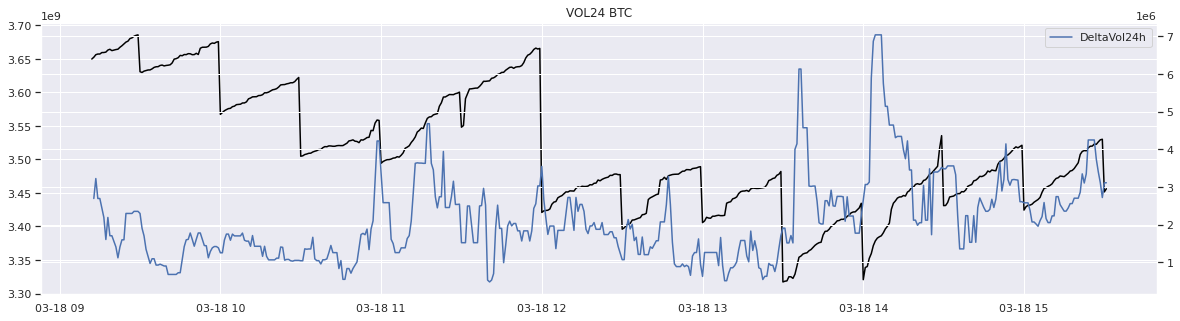

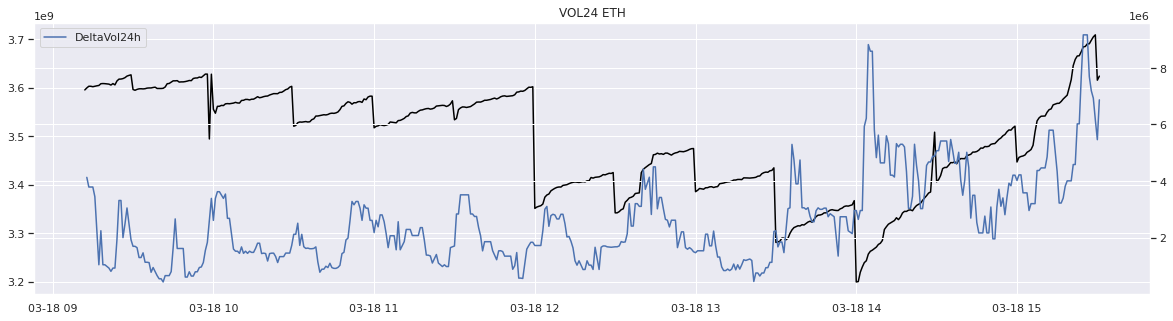

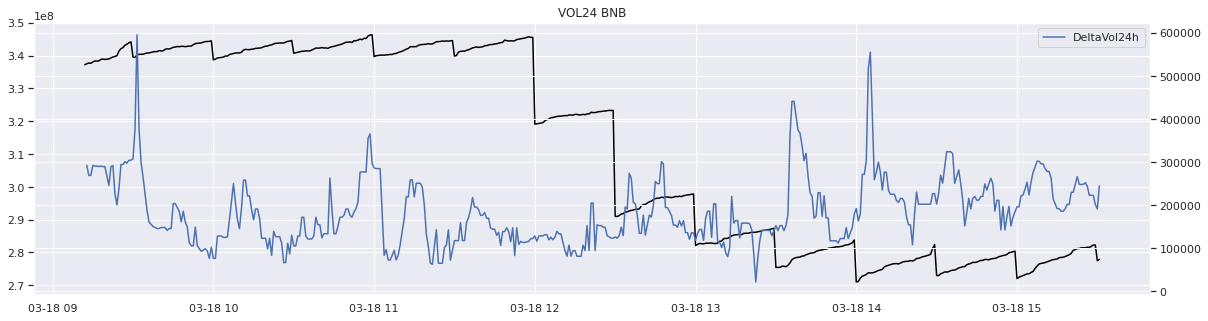

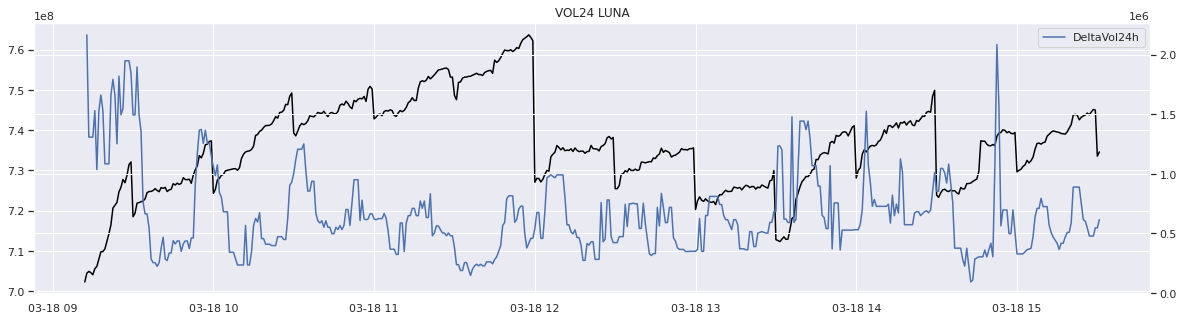

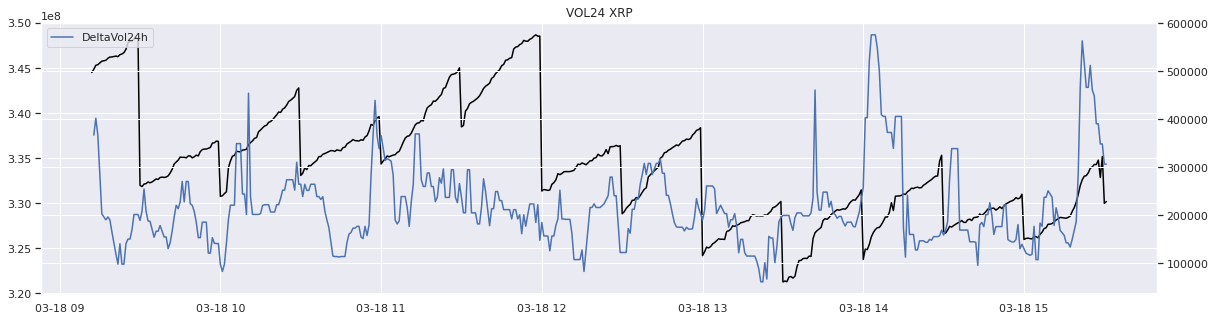

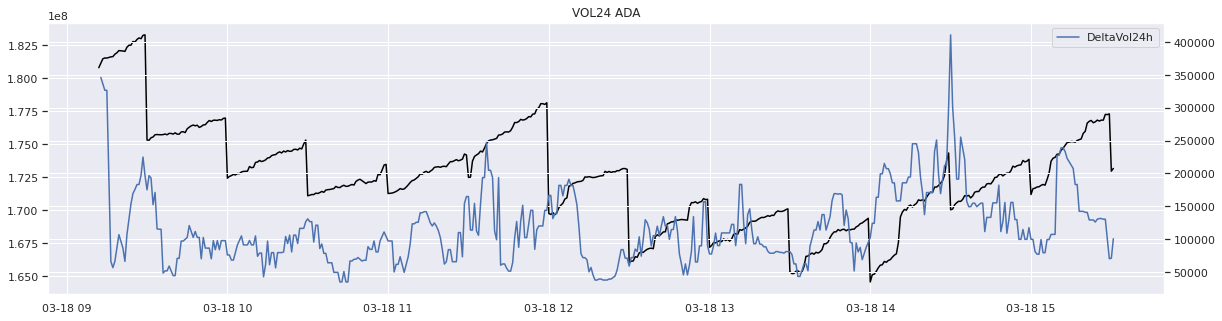

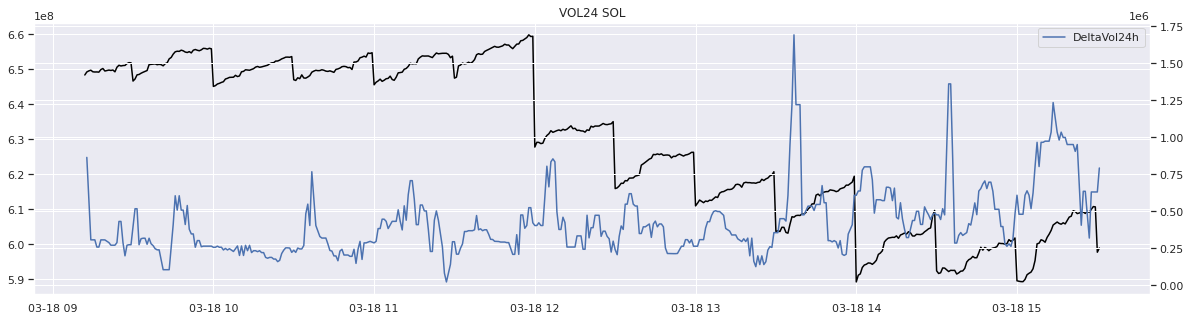

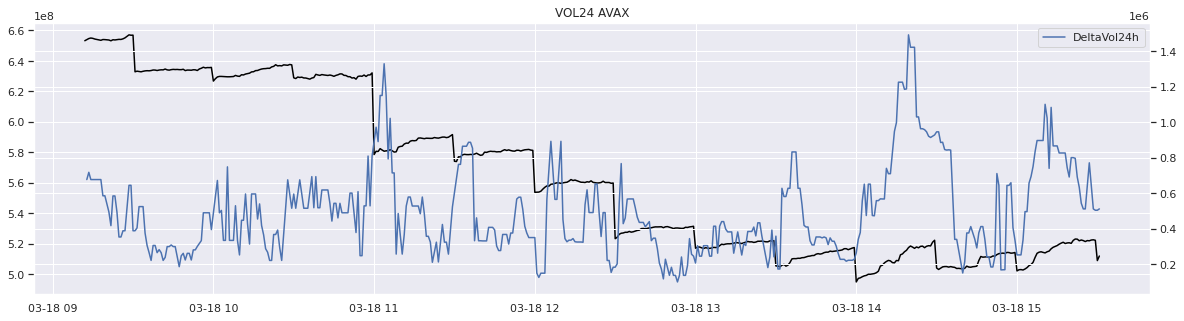

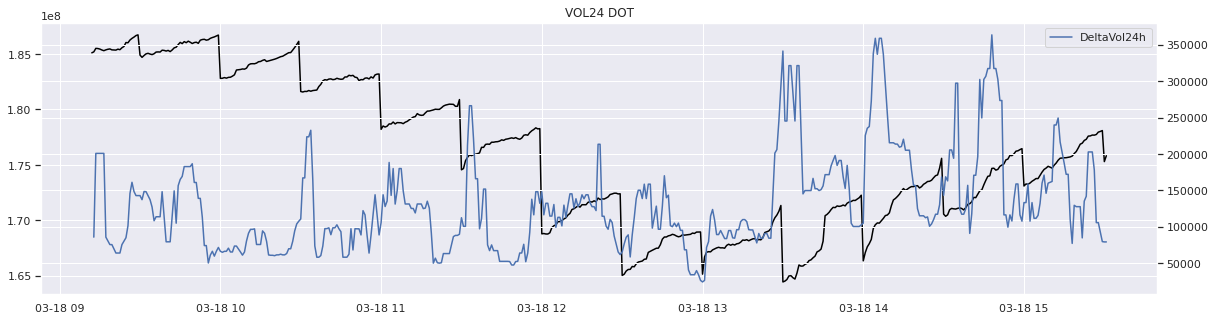

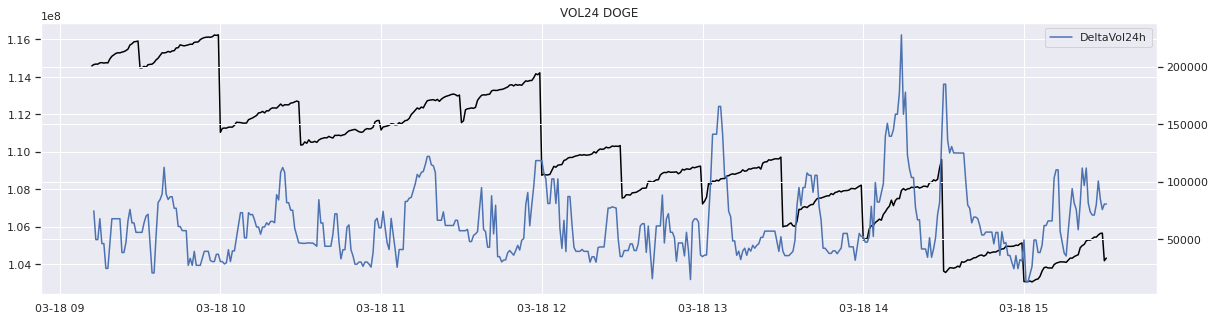

In [17]:
# Original volume variable vs delta
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'Vol24h'].iloc[:500], label='Vol24h', color='black')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'DeltaVol24h'].iloc[:500], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

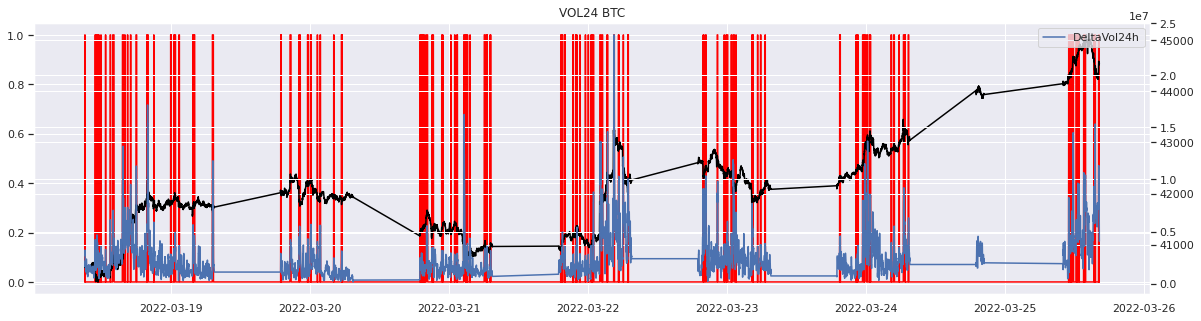

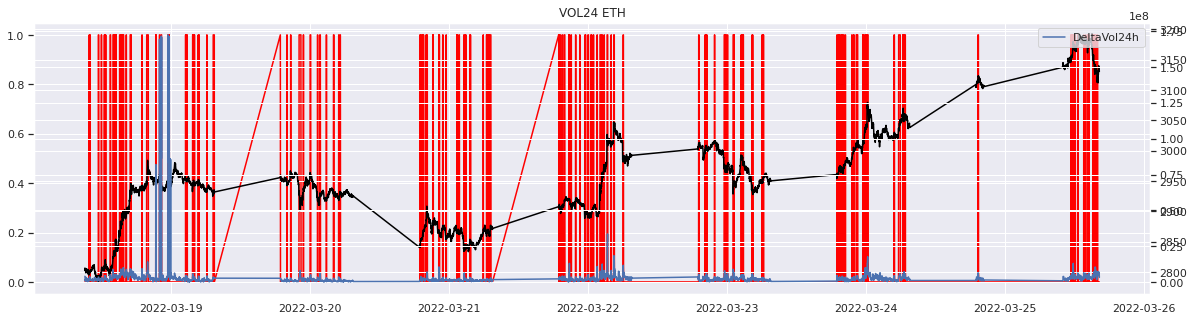

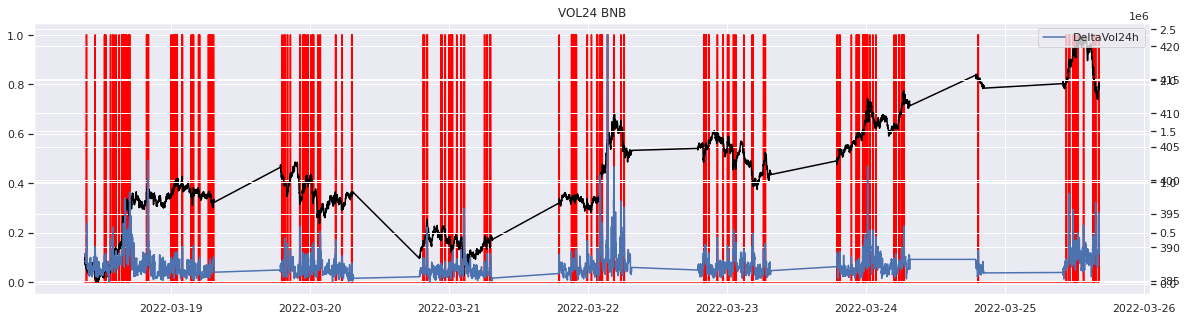

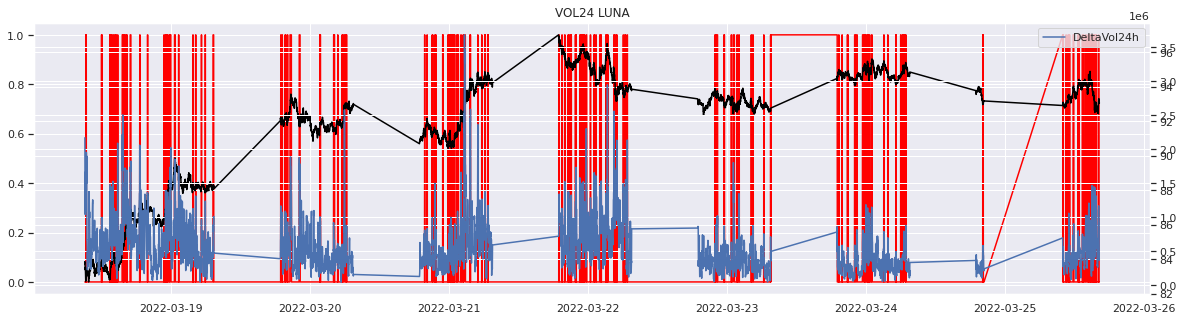

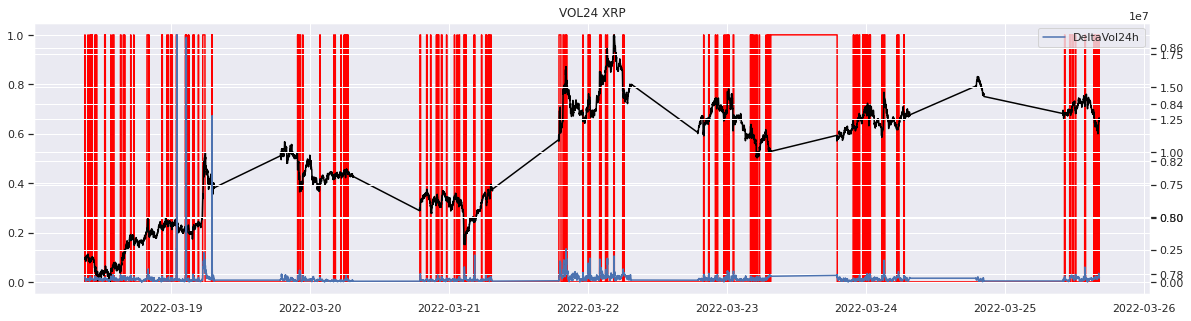

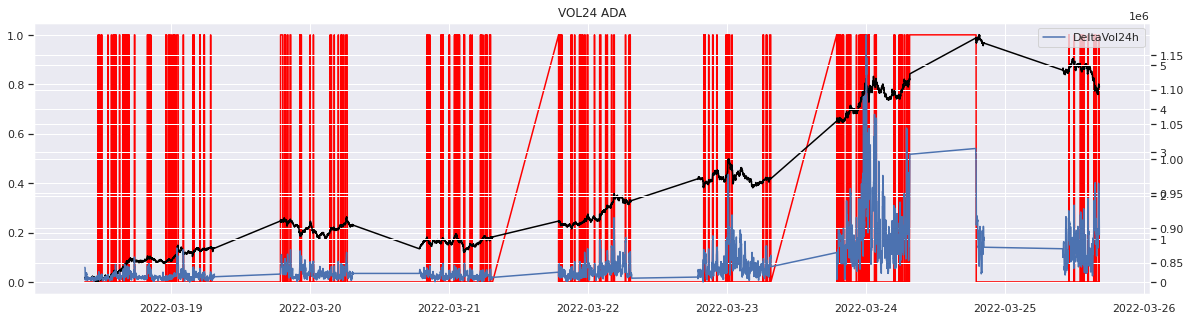

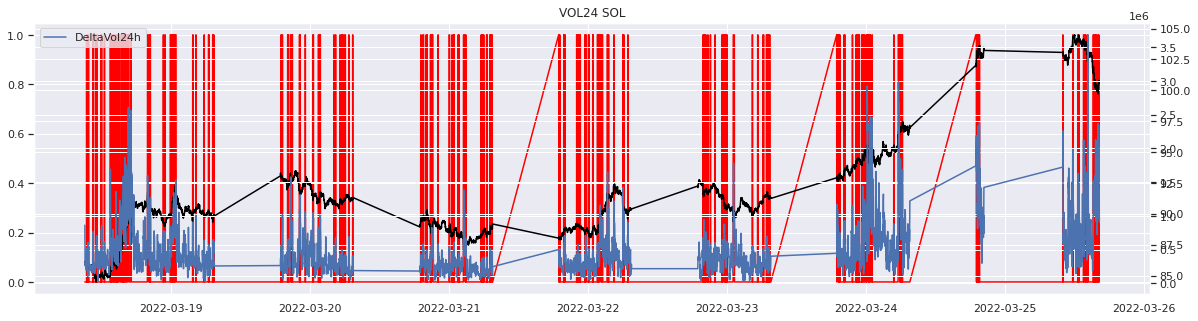

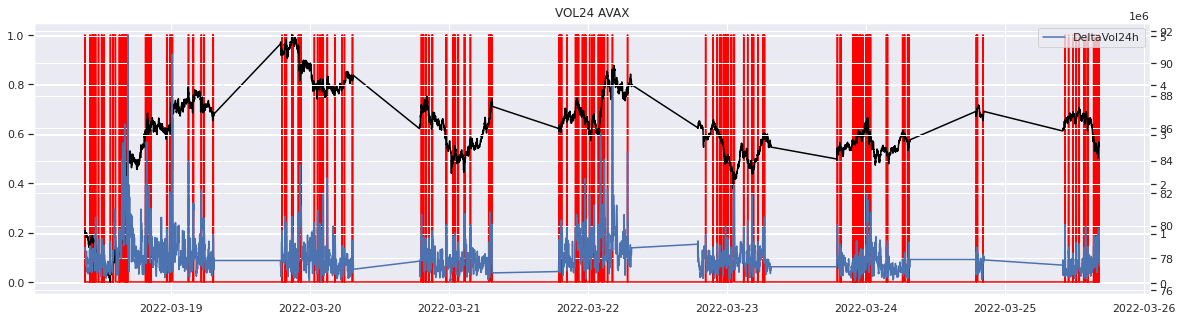

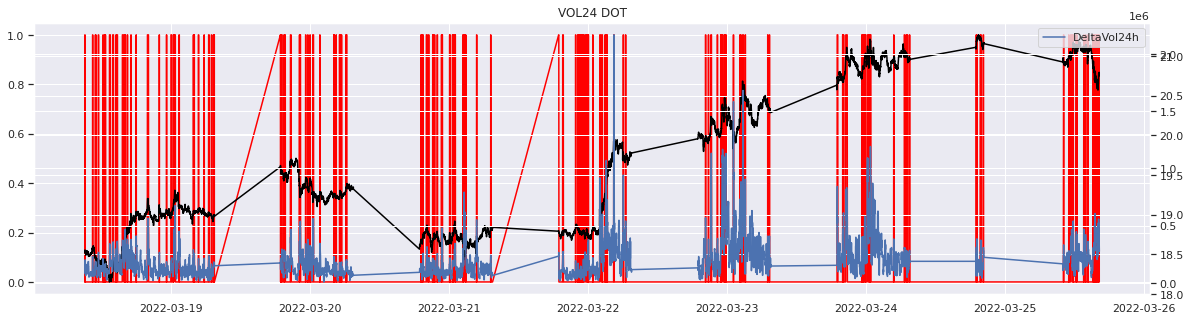

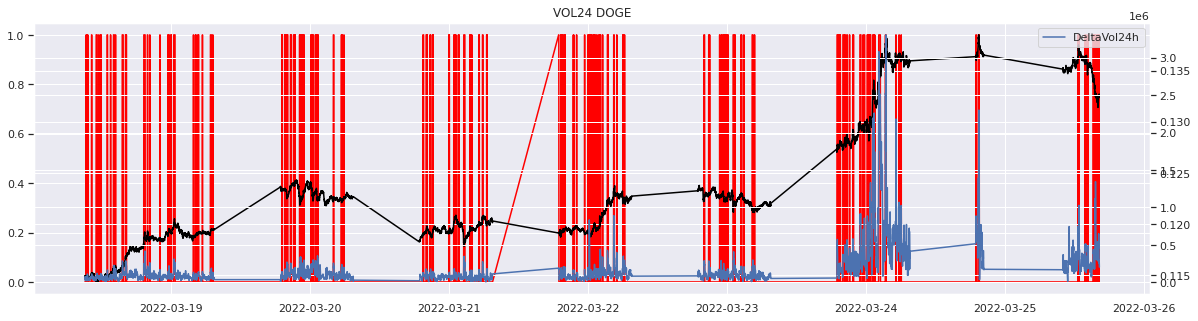

In [18]:
# Volume Value vs price
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax3 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol>90roll200'], label='DeltaVol>90roll200', color = 'red')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  ax3.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol24h'], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

## 04_03 - Momentum Variables
Owner: Salvador https://github.com/gitsalva

### 04_03_01 - ROC
Rate of Change (ROC): momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.

https://www.investopedia.com/terms/r/rateofchange.asp


In [19]:
# Create ROC
period_roc = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'ROC'+str(period_roc)] = talib.ROC(df.loc[filter_crypto_i, 'Price'], period_roc)

df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50  
73825  1.100721e+06             0.0                 0.0  0.187461  
73826  9.051129e+05             0.0                 0.0  0.533508  
73827  3.518652e+05             0.0                 0.0 -0.092163  
73828  2.749422e+05             0.0                 0.0  0.457001  
73829  2.038144e+05             0.0                 0.0  0.103834

### 04_03_02 - MOM
The momentum oscillator measures the amount that a security has changed in a certain period over a certain period. 

In [20]:
# Create MOM
period_mom = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'MOM'+str(period_mom)] = talib.MOM(df.loc[filter_crypto_i, 'Price'], period_mom)

df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  
73825  1.100721e+06             0.0                 0.0  0.187461  0.002065  
73826  9.051129e+05             0.0                 0.0  0.533508  0.534230  
73827  3.518652e+05             0.0                 0.0 -0.092163 -0.078299  
73828  2.749422e+05             0.0                 0.0  0.457001  0.094546  
73829  2.038144e+05             0.0                 0.0  0.103834  0.000137

### 04_03_03 - CMO
The formula calculates the difference between the sum of recent gains and the sum of recent losses and then divides the result by the sum of all price movements over the same period.

In [21]:
# Create CMO
period_cmo = 100
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'CMO'+str(period_cmo)] = talib.CMO(df.loc[filter_crypto_i, 'Price'], period_cmo)

df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
73825  1.100721e+06             0.0                 0.0  0.187461  0.002065   
73826  9.051129e+05             0.0                 0.0  0.533508  0.534230   
73827  3.518652e+05             0.0                 0.0 -0.092163 -0.078299   
73828  2.749422e+05             0.0                 0.0  0.457001  0.094546   
73829  2.038144e+05             0.0                 0.0  0.103834  0.000137   

          CMO100  
73825  -9.053116  
73826  -8.652853  
73827  -8.116321  
73828  -4.450078  
73829 -11.157900

### 04_03_04 - Buying Indicators

In [22]:
# ROC
#Zero-line crossovers can be used to signal trend changes. 
df['ROCLowerThan0'] = (df['ROC'+str(period_roc)]<0).astype(int)
df['ROCHigherThan0'] = (df['ROC'+str(period_roc)]>0).astype(int)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
73825  1.100721e+06             0.0                 0.0  0.187461  0.002065   
73826  9.051129e+05             0.0                 0.0  0.533508  0.534230   
73827  3.518652e+05             0.0                 0.0 -0.092163 -0.078299   
73828  2.749422e+05             0.0                 0.0  0.457001  0.094546   
73829  2.038144e+05             0.0                 0.0  0.103834  0.000137   

          CMO100  ROCLowerThan0  ROCHigherThan0  
73825  -9.053116              0               1  
73826  -8.652853              0               1  
73827  -8.116321              1               0  
73828  -4.450078              0               1  
73829 -11.157900              0               1

In [23]:
# MOM 
#Crossing above the zero line during an uptrend would be a buy signal and a crossing below the 
#zero line during a downtrend would be a sell short signal.
df['MOMLowerThan0'] = (df['MOM'+str(period_mom)]<0).astype(int)
df['MOMHigherThan0'] = (df['MOM'+str(period_mom)]>0).astype(int)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051   
73826  100.275545  100.762181  100.611398  100.475685  100.865916   
73827   84.744609   84.984337   84.948535   84.847462   85.079393   
73828   20.687584   20.761145   20.764759   20.721402   20.773447   
73829    0.132288    0.133039    0.132500    0.132484    0.133036   

        DeltaVol24h  DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  \
73825  1.100721e+06             0.0                 0.0  0.187461  0.002065   
73826  9.051129e+05             0.0                 0.0  0.533508  0.534230   
73827  3.518652e+05             0.0                 0.0 -0.092163 -0.078299   
73828  2.749422e+05             0.0                 0.0  0.457001  0.094546   
73829  2.038144e+05             0.0                 0.0  0.103834  0.000137   

          CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  
73825  -9.053116              0               1              0               1  
73826  -8.652853              0               1              0               1  
73827  -8.116321              1               0              1               0  
73828  -4.450078              0               1              0               1  
73829 -11.157900              0               1              0               1

In [24]:
# CMO 
#Buy under -50, sell above 50
df['CMOHigherThan50'] = (df['CMO'+str(period_cmo)]>50).astype(int)
df['CMOLowerThan50'] = (df['CMO'+str(period_cmo)]<50).astype(int)
df['CMOLowerThan-50'] = (df['CMO'+str(period_cmo)]<-50).astype(int)
df['CMOHigherThan-50'] = (df['CMO'+str(period_cmo)]>-50).astype(int)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

          MOM50     CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  \
73825  0.002065  -9.053116              0               1              0   
73826  0.534230  -8.652853              0               1              0   
73827 -0.078299  -8.116321              1               0              1   
73828  0.094546  -4.450078              0               1              0   
73829  0.000137 -11.157900              0               1              0   

       MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
73825               1                0               1                0   
73826               1                0               1                0   
73827               0                0               1                0   
73828               1                0               1                0   
73829               1                0               1                0   

       CMOHigherThan-50  
73825                 1  
73826                 1  
73827                 1  
73828                 1  
73829                 1  

[5 rows x 24 columns]

### 04_04_05 - Plot

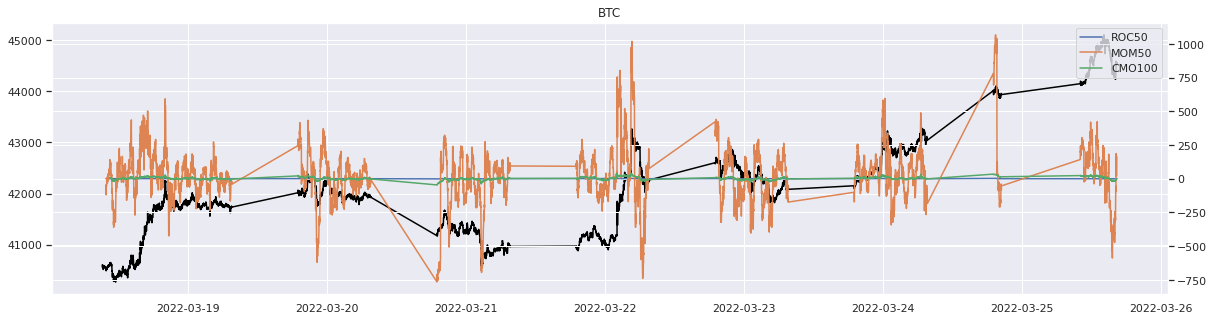

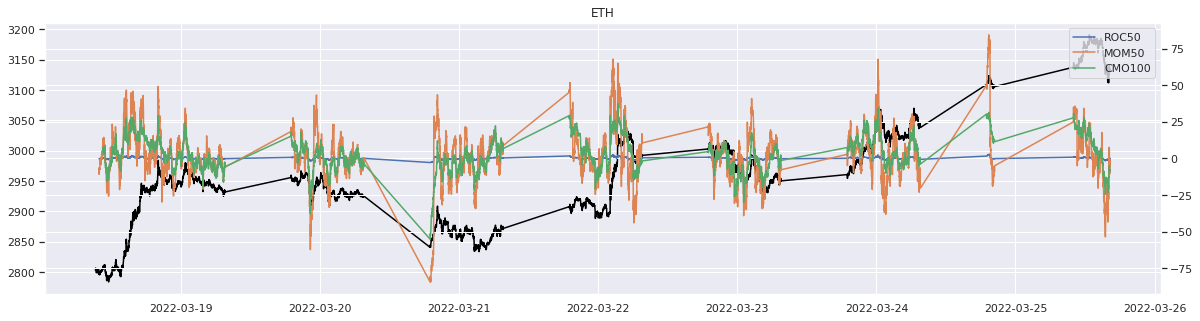

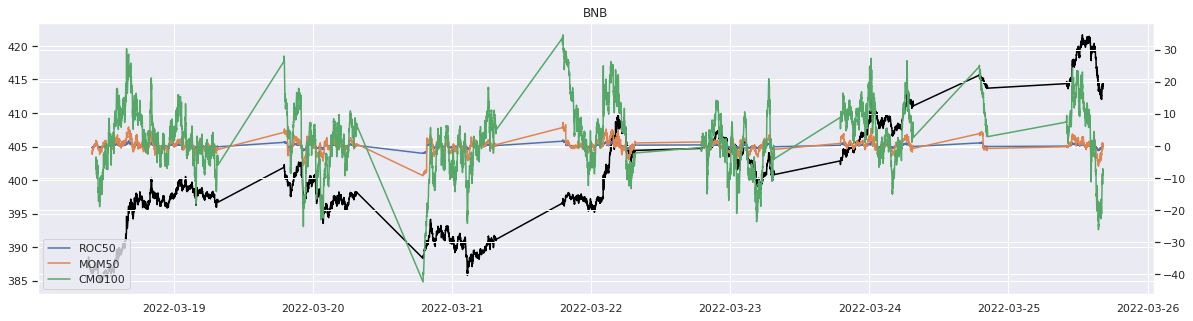

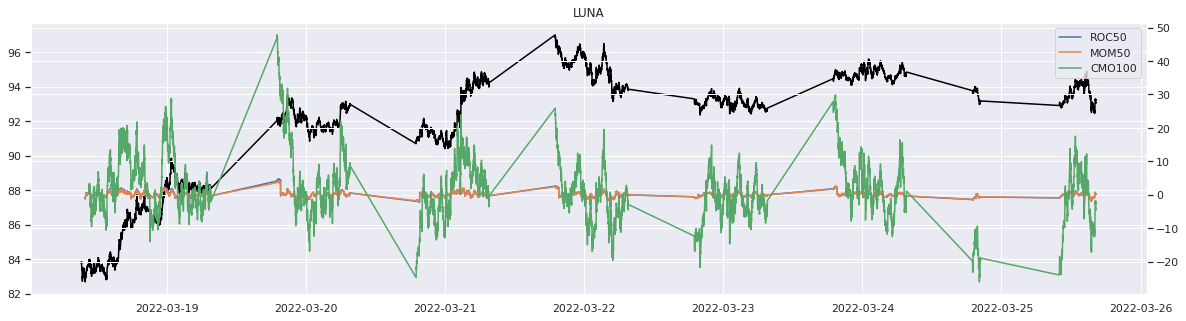

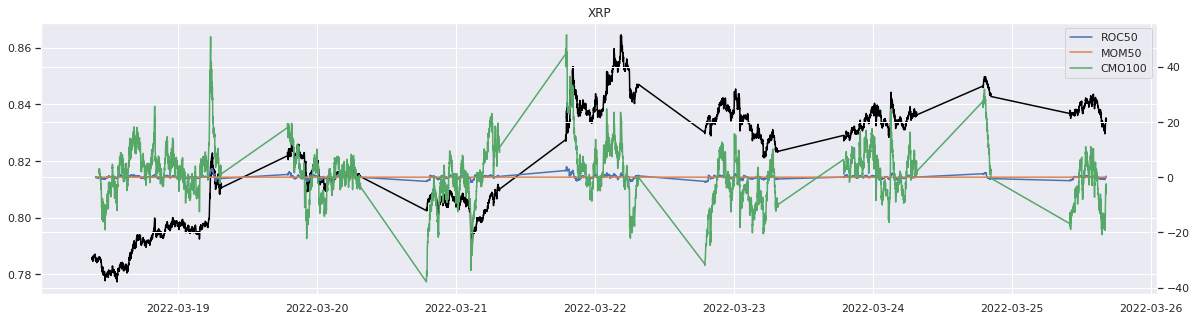

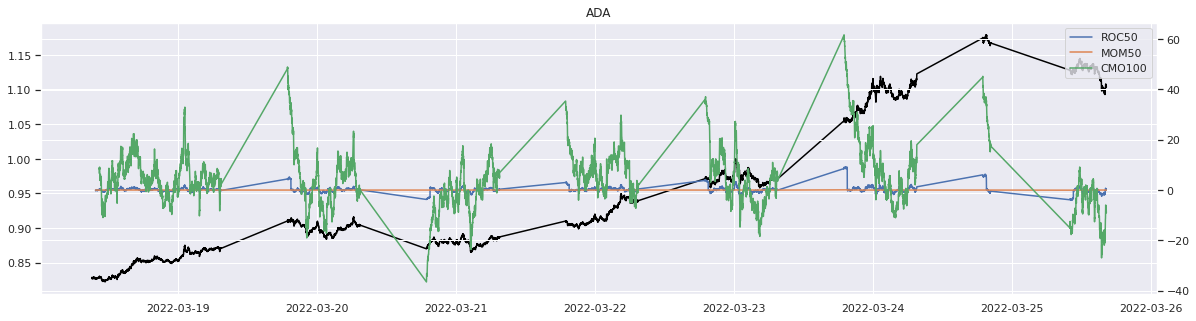

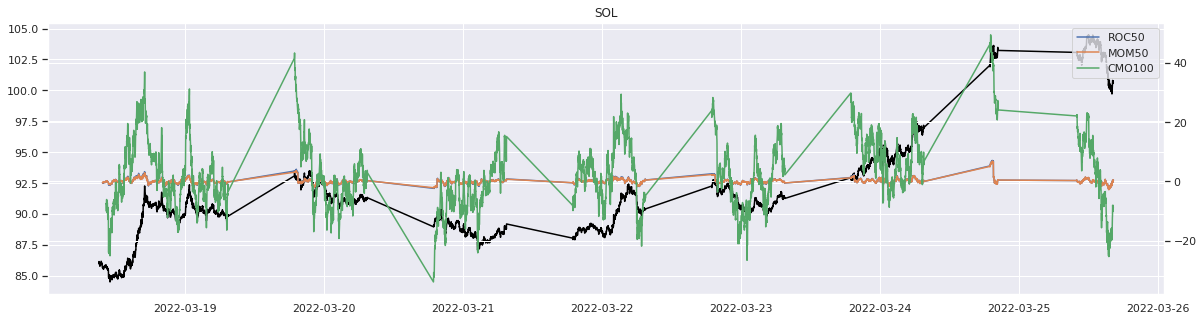

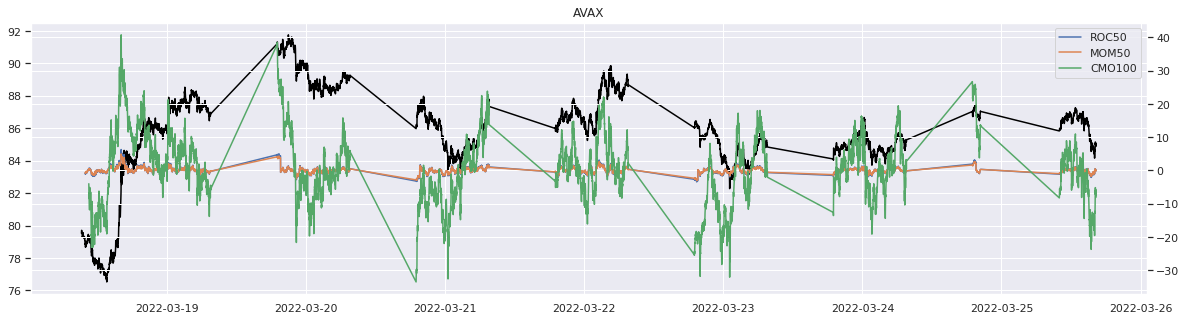

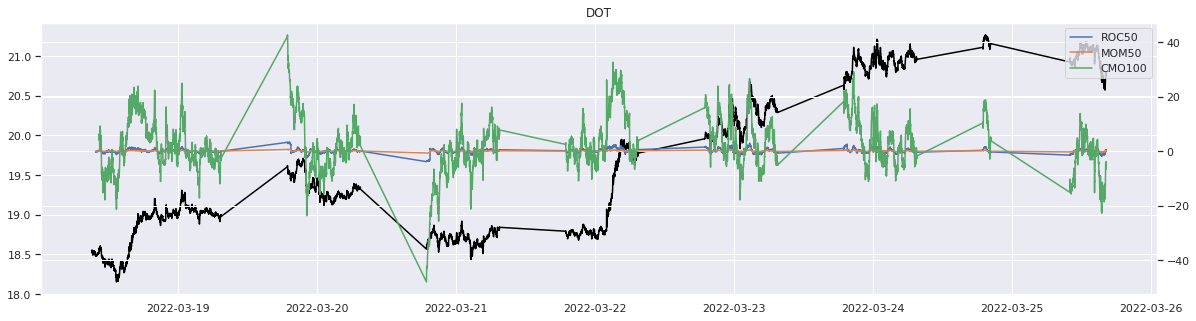

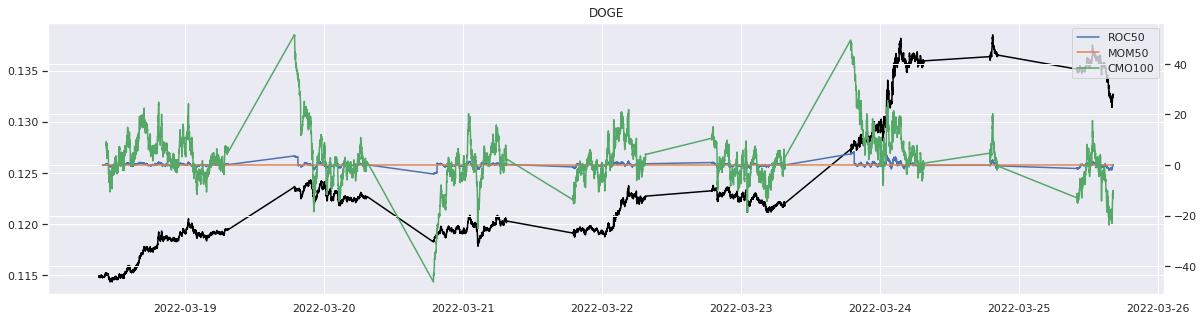

In [25]:
roc_cols = [col for col in df.columns if (("ROC" in col)&(len(col)<10))]
mom_cols = [col for col in df.columns if (("MOM" in col)&(len(col)<10))]
cmo_cols = [col for col in df.columns if (("CMO" in col)&(len(col)<10))]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in roc_cols + mom_cols + cmo_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_04 - Volatility Variables
Owner: Ángel https://github.com/PerezAng

### 04_04_01 - SHARPE Ratio
[Investopedia](https://www.investopedia.com/terms/s/sharperatio.asp#:~:text=The%20Sharpe%20ratio%20is%20calculated,of%20the%20portfolio's%20excess%20return.)


In [26]:
rf = 0 # risk free rate
N = 100

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

In [27]:
# Create SHARPE
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    # Sharpe
    df.loc[filter_crypto_i, 'Sharpe'] = (
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf) / 
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).std() * np.sqrt(N))
    )
        
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

          CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  \
73825  -9.053116              0               1              0   
73826  -8.652853              0               1              0   
73827  -8.116321              1               0              1   
73828  -4.450078              0               1              0   
73829 -11.157900              0               1              0   

       MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  \
73825               1                0               1                0   
73826               1                0               1                0   
73827               0                0               1                0   
73828               1                0               1                0   
73829               1                0               1                0   

       CMOHigherThan-50    Sharpe  
73825                 1 -1.011493  
73826                 1 -1.210111  
73827                 1 -1.063727  
73828                 1 -0.726305  
73829                 1 -1.248964  

[5 rows x 25 columns]

### 04_04_02 - Sortino Rate
[Investopedia](https://www.investopedia.com/terms/s/sortinoratio.asp)

In [28]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [29]:
# Create SORTINO
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'mean_sortino'] = (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf)
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'Price'].pct_change()
    df.loc[((filter_crypto_i)&(df['std_neg']>=0)), 'std_neg'] = np.NaN
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'std_neg'].rolling(N, min_periods=1).std() * np.sqrt(N)

# Sortino
df['Sortino'] = df['mean_sortino'] / df['std_neg']
df = df.drop(['mean_sortino', 'std_neg'], axis=1)
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

       ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  \
73825              0               1              0               1   
73826              0               1              0               1   
73827              1               0              1               0   
73828              0               1              0               1   
73829              0               1              0               1   

       CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50  \
73825                0               1                0                 1   
73826                0               1                0                 1   
73827                0               1                0                 1   
73828                0               1                0                 1   
73829                0               1                0                 1   

         Sharpe   Sortino  
73825 -1.011493 -1.417737  
73826 -1.210111 -1.880374  
73827 -1.063727 -1.868613  
73828 -0.726305 -1.511165  
73829 -1.248964 -1.619279  

[5 rows x 26 columns]

### 04_04_03 - ATR & NATR
https://mrjbq7.github.io/ta-lib/func_groups/volatility_indicators.html

In [30]:
N = 100

for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i

  # NATR
  df.loc[filter_crypto_i, 'NATR'+str(N)] = talib.NATR(
      high = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).max(), 
      low = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).min(), 
      close = df.loc[filter_crypto_i, 'Price'], 
      timeperiod=N)
  
df.tail()

Timestamp Crypto       Price        Vol24h       SMA10  \
73825 2022-03-25 16:18:45    ADA    1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL  100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX   84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT   20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE    0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

       ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  \
73825               1              0               1                0   
73826               1              0               1                0   
73827               0              1               0                0   
73828               1              0               1                0   
73829               1              0               1                0   

       CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino  \
73825               1                0                 1 -1.011493 -1.417737   
73826               1                0                 1 -1.210111 -1.880374   
73827               1                0                 1 -1.063727 -1.868613   
73828               1                0                 1 -0.726305 -1.511165   
73829               1                0                 1 -1.248964 -1.619279   

        NATR100  
73825  2.349401  
73826  2.379251  
73827  1.957624  
73828  1.708723  
73829  2.098655  

[5 rows x 27 columns]

### 04_04_04 - Plot

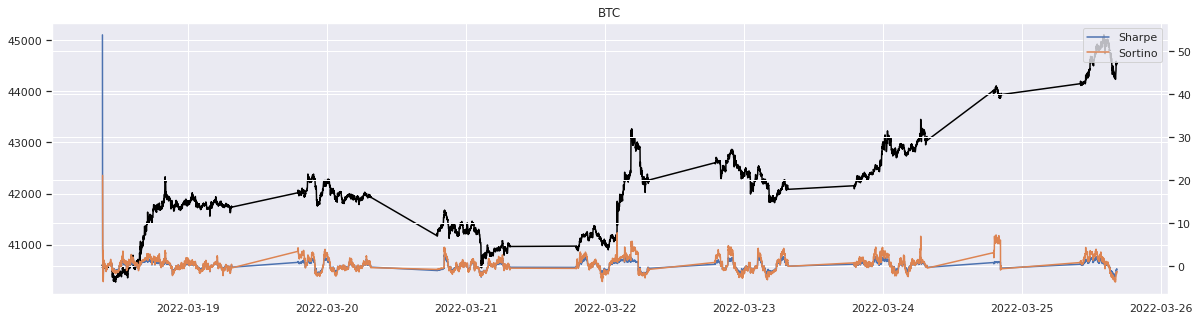

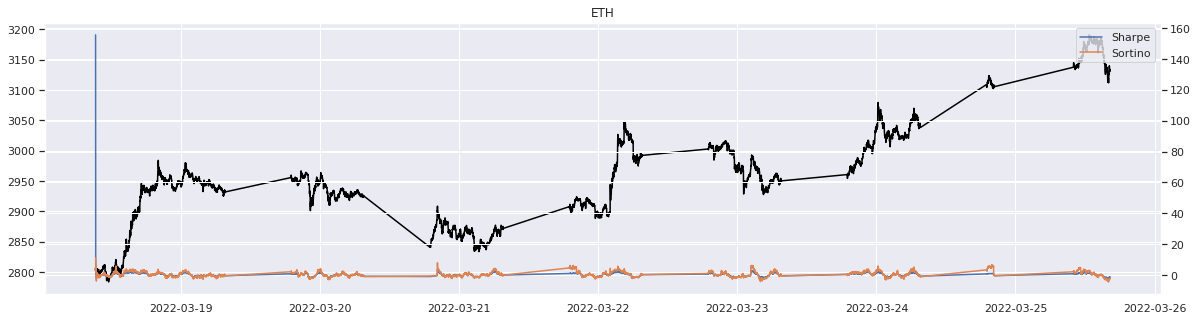

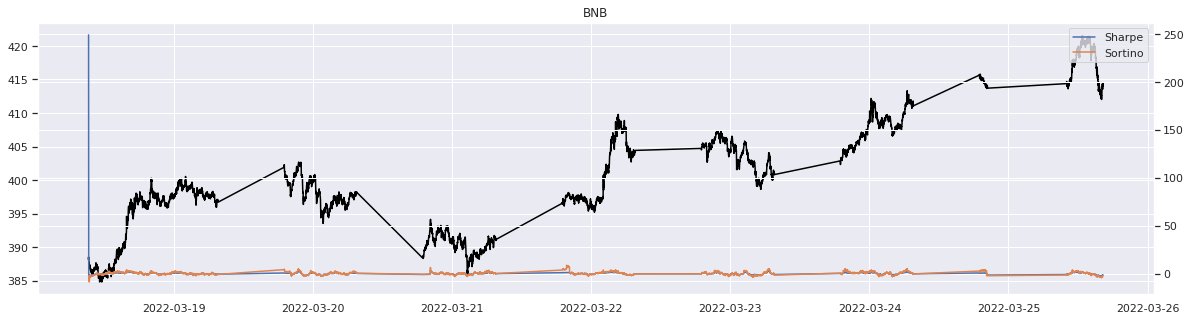

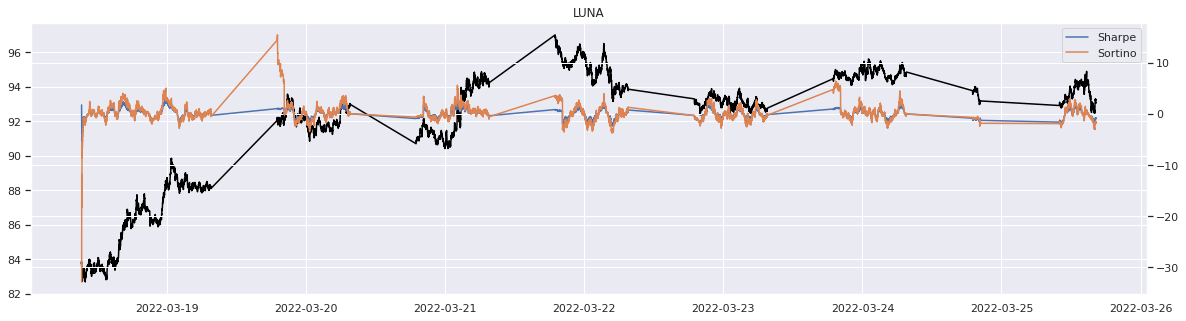

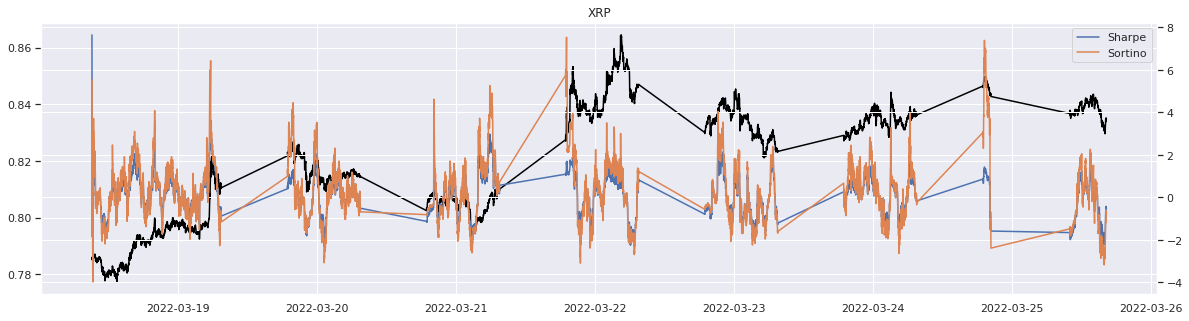

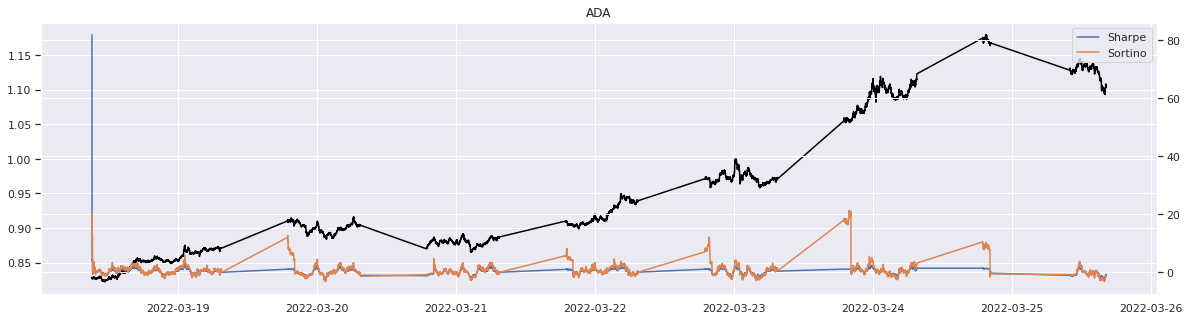

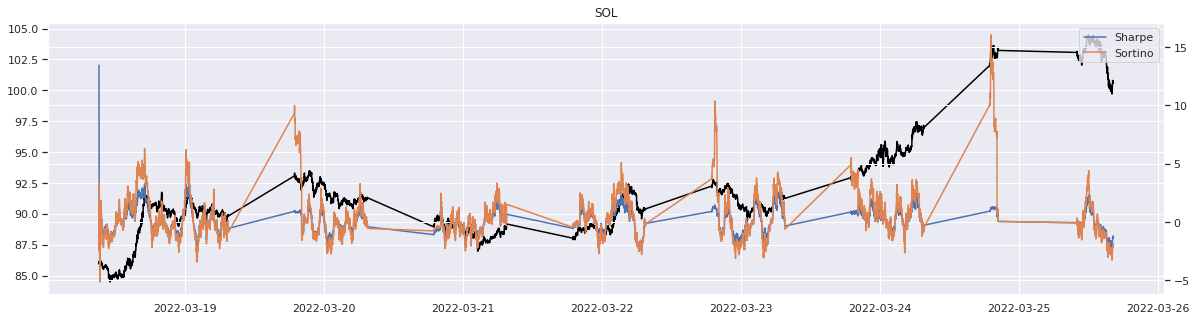

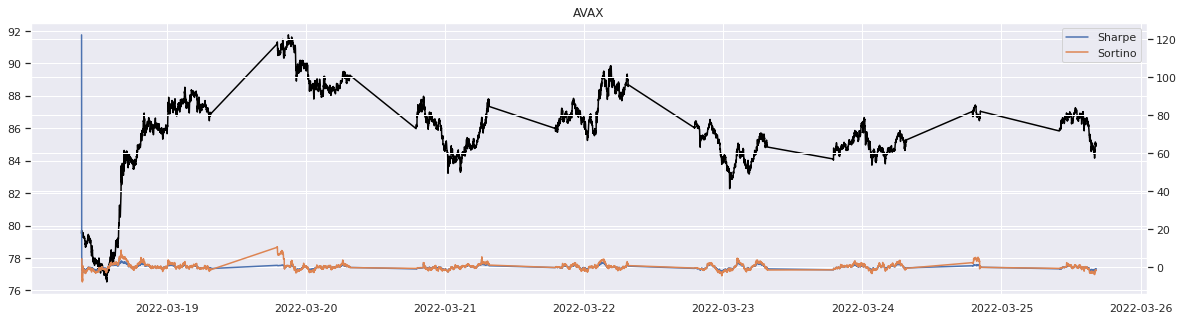

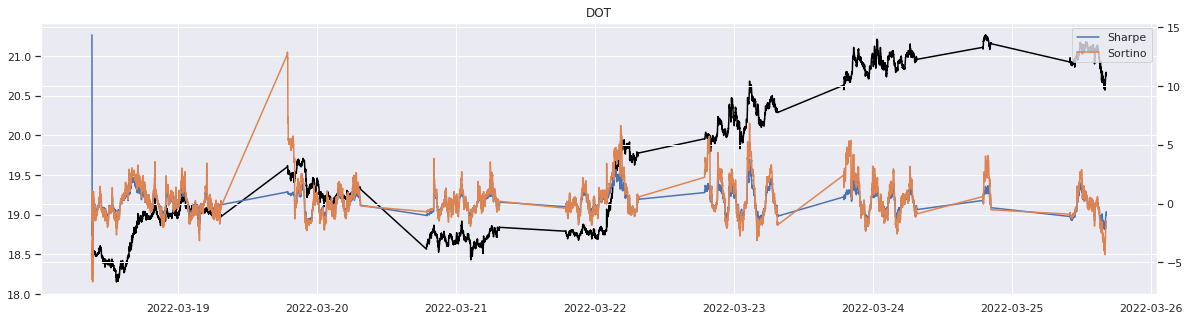

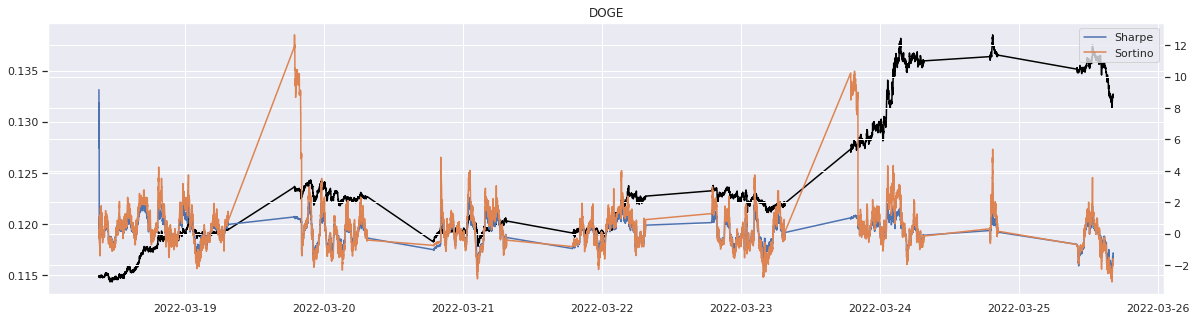

In [31]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in ['Sharpe', 'Sortino']:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

# 05 - Create Target

In [32]:
# Separation between rows = 45"

# Target horizon (how long from now we want the model to predict)
horizon_in_mins = 20  # in mins
horizon_rows = int(horizon_in_mins*60/45)
horizon_rows

26

## 05_01 Numerical Value

In [33]:
# Target precio
df['TARGET_num_'+str(horizon_rows)] = (df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price'])
df

Timestamp Crypto         Price        Vol24h       SMA10  \
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09         NaN   
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09         NaN   
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08         NaN   
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08         NaN   
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08         NaN   
...                   ...    ...           ...           ...         ...   
73825 2022-03-25 16:18:45    ADA      1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL    100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX     84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT     20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE      0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
0             NaN         NaN         NaN         NaN         NaN  ...   
1             NaN         NaN         NaN         NaN         NaN  ...   
2             NaN         NaN         NaN         NaN         NaN  ...   
3             NaN         NaN         NaN         NaN         NaN  ...   
4             NaN         NaN         NaN         NaN         NaN  ...   
...           ...         ...         ...         ...         ...  ...   
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

       MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  \
0                  0               0                0               0   
1                  0               0                0               0   
2                  0               0                0               0   
3                  0               0                0               0   
4                  0               0                0               0   
...              ...             ...              ...             ...   
73825              0               1                0               1   
73826              0               1                0               1   
73827              1               0                0               1   
73828              0               1                0               1   
73829              0               1                0               1   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
73825                0                 1 -1.011493 -1.417737  2.349401   
73826                0                 1 -1.210111 -1.880374  2.379251   
73827                0                 1 -1.063727 -1.868613  1.957624   
73828                0                 1 -0.726305 -1.511165  1.708723   
73829                0                 1 -1.248964 -1.619279  2.098655   

       TARGET_num_26  
0           1.000097  
1           1.000435  
2           0.996281  
3           0.996397  
4           1.001211  
...              ...  
73825            NaN  
73826            NaN  
73827            NaN  
73828            NaN  
73829            NaN  

[73830 rows x 28 columns]

## 05_02 Categorical Target

In [34]:
# Target up by 2%
df['TARGET_cat2_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.02).astype(int)

# Target up by 1%
df['TARGET_cat1_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.01).astype(int)

# Target up by 0.5%
df['TARGET_cat05_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.005).astype(int)

# Target up
df['TARGET_cat0_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1).astype(int)

df

Timestamp Crypto         Price        Vol24h       SMA10  \
0     2022-03-18 09:12:00    BTC  40562.502806  3.649734e+09         NaN   
1     2022-03-18 09:12:00    ETH   2802.987669  3.595527e+09         NaN   
2     2022-03-18 09:12:00    BNB    388.140788  3.372194e+08         NaN   
3     2022-03-18 09:12:00   LUNA     83.733926  7.022888e+08         NaN   
4     2022-03-18 09:12:00    XRP      0.785357  3.444767e+08         NaN   
...                   ...    ...           ...           ...         ...   
73825 2022-03-25 16:18:45    ADA      1.103846  8.900039e+08    1.106109   
73826 2022-03-25 16:18:45    SOL    100.669529  9.580115e+08  100.655709   
73827 2022-03-25 16:18:45   AVAX     84.878270  4.585018e+08   85.023731   
73828 2022-03-25 16:18:45    DOT     20.783010  2.937826e+08   20.774093   
73829 2022-03-25 16:18:45   DOGE      0.132553  3.287007e+08    0.132529   

            SMA50      SMA100       EMA10       EMA50      EMA100  ...  \
0             NaN         NaN         NaN         NaN         NaN  ...   
1             NaN         NaN         NaN         NaN         NaN  ...   
2             NaN         NaN         NaN         NaN         NaN  ...   
3             NaN         NaN         NaN         NaN         NaN  ...   
4             NaN         NaN         NaN         NaN         NaN  ...   
...           ...         ...         ...         ...         ...  ...   
73825    1.100861    1.106056    1.105153    1.103148    1.107051  ...   
73826  100.275545  100.762181  100.611398  100.475685  100.865916  ...   
73827   84.744609   84.984337   84.948535   84.847462   85.079393  ...   
73828   20.687584   20.761145   20.764759   20.721402   20.773447  ...   
73829    0.132288    0.133039    0.132500    0.132484    0.133036  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
73825                0                 1 -1.011493 -1.417737  2.349401   
73826                0                 1 -1.210111 -1.880374  2.379251   
73827                0                 1 -1.063727 -1.868613  1.957624   
73828                0                 1 -0.726305 -1.511165  1.708723   
73829                0                 1 -1.248964 -1.619279  2.098655   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
0           1.000097               0               0                0   
1           1.000435               0               0                0   
2           0.996281               0               0                0   
3           0.996397               0               0                0   
4           1.001211               0               0                0   
...              ...             ...             ...              ...   
73825            NaN               0               0                0   
73826            NaN               0               0                0   
73827            NaN               0               0                0   
73828            NaN               0               0                0   
73829            NaN               0               0                0   

       TARGET_cat0_26  
0                   1  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
73825               0  
73826               0  
73827               0  
73828               0  
73829               0  

[73830 rows x 32 columns]

In [35]:
cat_targets = [col for col in df.columns if "TARGET_cat" in col]
cat_targets

['TARGET_cat2_26', 'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26']

In [36]:
df[cat_targets].mean()

TARGET_cat2_26     0.007991
TARGET_cat1_26     0.028688
TARGET_cat05_26    0.109468
TARGET_cat0_26     0.531247
dtype: float64

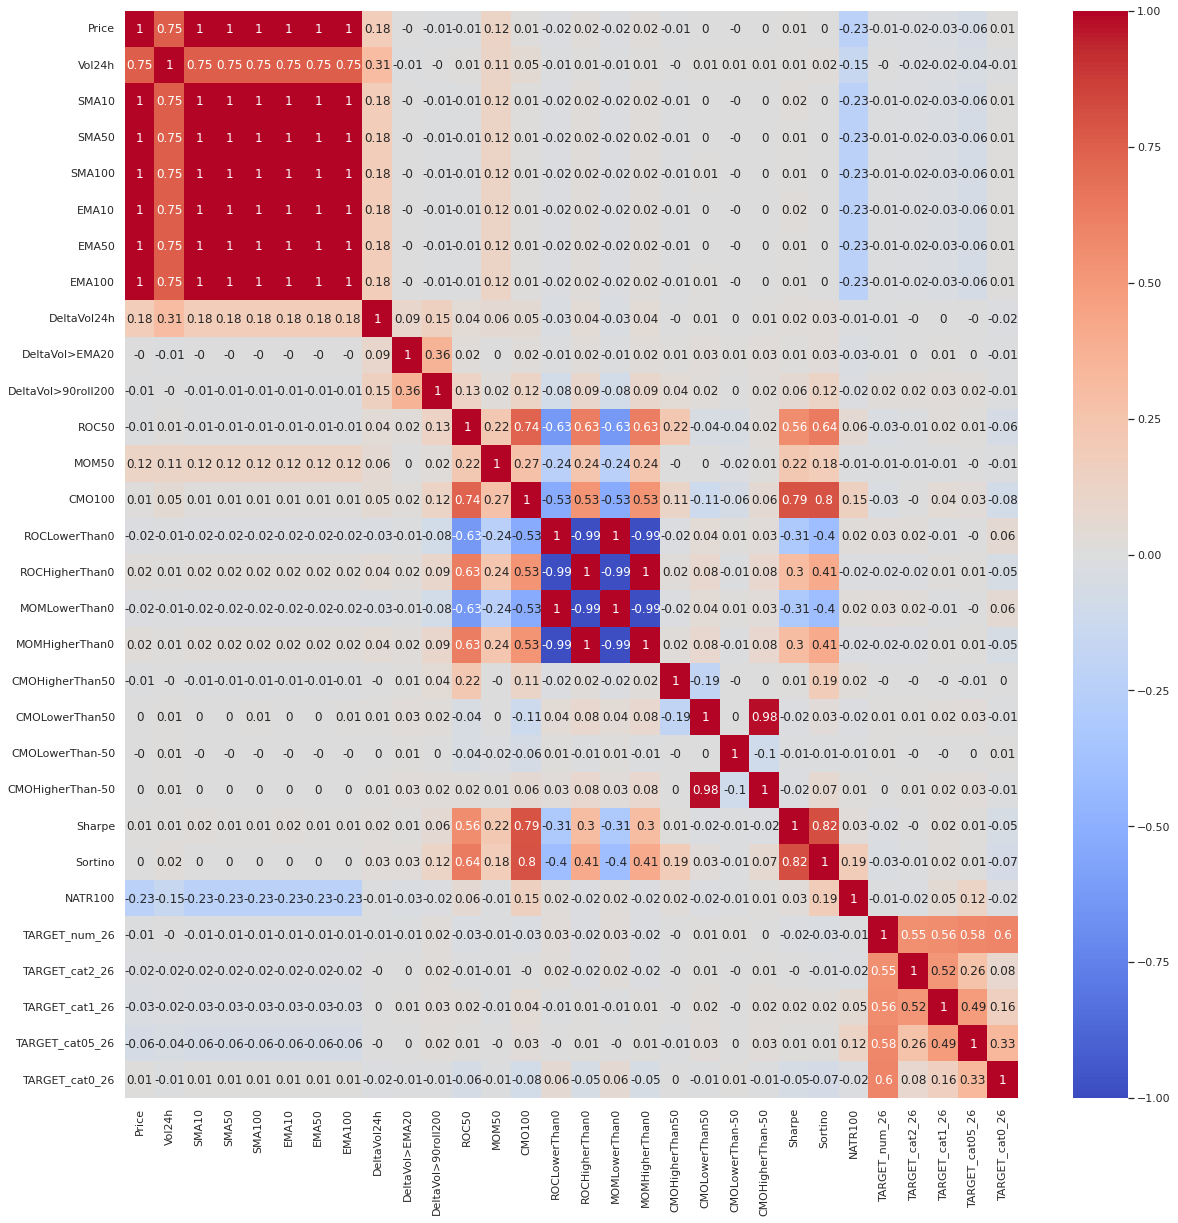

In [37]:
# Visualización coeficientes Pearson
plt.figure(figsize=(20,20))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 06 - Train model

## 06_01 - Process data

### 06_01_01 - Relativise variables
So that they are in a common scale.

In [38]:
df.tail(3)

Timestamp Crypto      Price        Vol24h      SMA10  \
73827 2022-03-25 16:18:45   AVAX  84.878270  4.585018e+08  85.023731   
73828 2022-03-25 16:18:45    DOT  20.783010  2.937826e+08  20.774093   
73829 2022-03-25 16:18:45   DOGE   0.132553  3.287007e+08   0.132529   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
73827  84.744609  84.984337  84.948535  84.847462  85.079393  ...   
73828  20.687584  20.761145  20.764759  20.721402  20.773447  ...   
73829   0.132288   0.133039   0.132500   0.132484   0.133036  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
73827                0                 1 -1.063727 -1.868613  1.957624   
73828                0                 1 -0.726305 -1.511165  1.708723   
73829                0                 1 -1.248964 -1.619279  2.098655   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
73827            NaN               0               0                0   
73828            NaN               0               0                0   
73829            NaN               0               0                0   

       TARGET_cat0_26  
73827               0  
73828               0  
73829               0  

[3 rows x 32 columns]

In [39]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [40]:
cols_to_make_rel = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100']
for col in cols_to_make_rel:
  df[col] = df[col]/df['Price']
df = df.dropna()
df

Timestamp Crypto         Price        Vol24h     SMA10  \
1000  2022-03-18 10:28:30    BTC  40627.877555  3.619456e+09  0.999461   
1001  2022-03-18 10:28:30    ETH   2807.884239  3.601225e+09  0.998885   
1002  2022-03-18 10:28:30    BNB    387.227125  3.444286e+08  0.999584   
1003  2022-03-18 10:28:30   LUNA     83.883935  7.483840e+08  0.997632   
1004  2022-03-18 10:28:30    XRP      0.785987  3.425028e+08  0.999317   
...                   ...    ...           ...           ...       ...   
73565 2022-03-25 15:59:15    ADA      1.097541  8.850185e+08  1.000138   
73566 2022-03-25 15:59:15    SOL    100.254998  9.714281e+08  0.998463   
73567 2022-03-25 15:59:15   AVAX     84.631752  4.696478e+08  0.999779   
73568 2022-03-25 15:59:15    DOT     20.641270  3.081868e+08  1.000230   
73569 2022-03-25 15:59:15   DOGE      0.132067  3.339518e+08  1.000625   

          SMA50    SMA100     EMA10     EMA50    EMA100  ...  CMOLowerThan-50  \
1000   0.998507  0.998475  0.999429  0.998829  0.998490  ...                0   
1001   0.997553  0.997719  0.998994  0.998040  0.997747  ...                0   
1002   0.998372  0.998828  0.999554  0.998876  0.998874  ...                0   
1003   0.994107  0.993336  0.998018  0.995342  0.993451  ...                0   
1004   0.998953  0.999481  0.999377  0.999179  0.999483  ...                0   
...         ...       ...       ...       ...       ...  ...              ...   
73565  1.004761  1.013567  0.999572  1.005286  1.011455  ...                0   
73566  1.001762  1.011600  0.998346  1.002931  1.009269  ...                0   
73567  1.002440  1.009114  0.999483  1.003247  1.007661  ...                0   
73568  1.003857  1.010476  0.999910  1.004274  1.008579  ...                0   
73569  1.005669  1.013512  1.000400  1.005697  1.011327  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
1000                  1  0.478823  0.732234  0.250430       0.999728   
1001                  1  0.433243  0.697888  0.322718       1.001385   
1002                  1 -0.531277 -0.686580  0.565036       0.999116   
1003                  1  0.156085  0.201928  1.275947       0.997754   
1004                  1  0.175785  0.253016  0.295900       0.998472   
...                 ...       ...       ...       ...            ...   
73565                 1 -2.142263 -2.941961  2.164588       1.005744   
73566                 1 -1.816720 -2.639348  2.157053       1.004135   
73567                 1 -1.978807 -3.316167  1.786176       1.002913   
73568                 1 -1.918640 -3.604341  1.524927       1.006867   
73569                 1 -2.202555 -2.787407  1.861661       1.003685   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
1000                0               0                0               0  
1001                0               0                0               1  
1002                0               0                0               0  
1003                0               0                0               0  
1004                0               0                0               0  
...               ...             ...              ...             ...  
73565               0               0                1               1  
73566               0               0                0               1  
73567               0               0                0               1  
73568               0               0                1               1  
73569               0               0                0               1  

[72570 rows x 32 columns]

### 06_01_02 - Delete incomplete data
Because our data is ingested for 12 hour, then on hold for 12 hour then ingested for 12 hours... The first values of an ingestion will lack of historic to construct certain variables (moving average, etc.).
Delete this rows.

In [50]:
# FIND timestamps after break periods
df_timestamps = pd.DataFrame({'Timestamps': df['Timestamp'].unique()})
df_timestamps['Delta'] = df_timestamps['Timestamps'] - df_timestamps['Timestamps'].shift(1)
df_timestamps['BigDelta'] = (df_timestamps['Delta'] > pd.Timedelta(5, 'min')).astype(int)
df_timestamps[df_timestamps['BigDelta']==1]

Timestamps           Delta  BigDelta
1670 2022-03-19 18:57:00 0 days 11:23:15         1
2670 2022-03-20 18:57:45 0 days 11:24:00         1
3669 2022-03-21 18:58:30 0 days 11:24:00         1
4669 2022-03-22 18:58:30 0 days 11:23:15         1
5668 2022-03-23 18:58:30 0 days 11:21:45         1
6668 2022-03-24 18:58:30 0 days 11:22:30         1
6782 2022-03-25 09:59:15 0 days 13:35:15         1

In [54]:
# Get timestamps after break periods (resuming timestamps) in a list
resuming_timestamps_list = sorted(df_timestamps.loc[df_timestamps['BigDelta']==1, "Timestamps"])
resuming_timestamps_list

[Timestamp('2022-03-19 18:57:00'),
 Timestamp('2022-03-20 18:57:45'),
 Timestamp('2022-03-21 18:58:30'),
 Timestamp('2022-03-22 18:58:30'),
 Timestamp('2022-03-23 18:58:30'),
 Timestamp('2022-03-24 18:58:30'),
 Timestamp('2022-03-25 09:59:15')]

In [57]:
# Delete 100 rows (per coin) after resuming the the ingestion
for ti in resuming_timestamps_list:
  tj = ti + pd.Timedelta(45, "sec")*100
  print("Deleting rows between", ti, "and", tj)
  
  # Keep only rows outiside ti - tj range
  filter_resuming_rows = ((df['Timestamp'] >= ti)&(df['Timestamp'] <= tj))
  print("Rows before deleting:", len(df))
  df = df[filter_resuming_rows==False]
  print("Rows after deleting:", len(df))
  print()

df = df.reset_index(drop=True)
df

Deleting rows between 2022-03-19 18:57:00 and 2022-03-19 20:12:00
Rows before deleting: 72570
Rows after deleting: 71570

Deleting rows between 2022-03-20 18:57:45 and 2022-03-20 20:12:45
Rows before deleting: 71570
Rows after deleting: 70570

Deleting rows between 2022-03-21 18:58:30 and 2022-03-21 20:13:30
Rows before deleting: 70570
Rows after deleting: 69570

Deleting rows between 2022-03-22 18:58:30 and 2022-03-22 20:13:30
Rows before deleting: 69570
Rows after deleting: 68570

Deleting rows between 2022-03-23 18:58:30 and 2022-03-23 20:13:30
Rows before deleting: 68570
Rows after deleting: 67570

Deleting rows between 2022-03-24 18:58:30 and 2022-03-24 20:13:30
Rows before deleting: 67570
Rows after deleting: 66570

Deleting rows between 2022-03-25 09:59:15 and 2022-03-25 11:14:15
Rows before deleting: 66570
Rows after deleting: 65570



Timestamp Crypto         Price        Vol24h     SMA10  \
0     2022-03-18 10:28:30    BTC  40627.877555  3.619456e+09  0.999461   
1     2022-03-18 10:28:30    ETH   2807.884239  3.601225e+09  0.998885   
2     2022-03-18 10:28:30    BNB    387.227125  3.444286e+08  0.999584   
3     2022-03-18 10:28:30   LUNA     83.883935  7.483840e+08  0.997632   
4     2022-03-18 10:28:30    XRP      0.785987  3.425028e+08  0.999317   
...                   ...    ...           ...           ...       ...   
65565 2022-03-25 15:59:15    ADA      1.097541  8.850185e+08  1.000138   
65566 2022-03-25 15:59:15    SOL    100.254998  9.714281e+08  0.998463   
65567 2022-03-25 15:59:15   AVAX     84.631752  4.696478e+08  0.999779   
65568 2022-03-25 15:59:15    DOT     20.641270  3.081868e+08  1.000230   
65569 2022-03-25 15:59:15   DOGE      0.132067  3.339518e+08  1.000625   

          SMA50    SMA100     EMA10     EMA50    EMA100  ...  CMOLowerThan-50  \
0      0.998507  0.998475  0.999429  0.998829  0.998490  ...                0   
1      0.997553  0.997719  0.998994  0.998040  0.997747  ...                0   
2      0.998372  0.998828  0.999554  0.998876  0.998874  ...                0   
3      0.994107  0.993336  0.998018  0.995342  0.993451  ...                0   
4      0.998953  0.999481  0.999377  0.999179  0.999483  ...                0   
...         ...       ...       ...       ...       ...  ...              ...   
65565  1.004761  1.013567  0.999572  1.005286  1.011455  ...                0   
65566  1.001762  1.011600  0.998346  1.002931  1.009269  ...                0   
65567  1.002440  1.009114  0.999483  1.003247  1.007661  ...                0   
65568  1.003857  1.010476  0.999910  1.004274  1.008579  ...                0   
65569  1.005669  1.013512  1.000400  1.005697  1.011327  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
0                     1  0.478823  0.732234  0.250430       0.999728   
1                     1  0.433243  0.697888  0.322718       1.001385   
2                     1 -0.531277 -0.686580  0.565036       0.999116   
3                     1  0.156085  0.201928  1.275947       0.997754   
4                     1  0.175785  0.253016  0.295900       0.998472   
...                 ...       ...       ...       ...            ...   
65565                 1 -2.142263 -2.941961  2.164588       1.005744   
65566                 1 -1.816720 -2.639348  2.157053       1.004135   
65567                 1 -1.978807 -3.316167  1.786176       1.002913   
65568                 1 -1.918640 -3.604341  1.524927       1.006867   
65569                 1 -2.202555 -2.787407  1.861661       1.003685   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
0                   0               0                0               0  
1                   0               0                0               1  
2                   0               0                0               0  
3                   0               0                0               0  
4                   0               0                0               0  
...               ...             ...              ...             ...  
65565               0               0                1               1  
65566               0               0                0               1  
65567               0               0                0               1  
65568               0               0                1               1  
65569               0               0                0               1  

[65570 rows x 32 columns]

## 06_01 Train - Test split

In [ ]:
# TOTAL TIMESTAMPS
timestamps = df['Timestamp'].unique()
print(len(timestamps))

# Train - test split
index_to_split = int(0.7*len(timestamps))
timestamps_train = timestamps[:index_to_split]
print(len(timestamps_train))
timestamps_test = timestamps[index_to_split:]
print(len(timestamps_test))

2634
1843
791


In [ ]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [ ]:
timestamp = ['Timestamp']
coins = ['Crypto']
feat = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100', 
        'DeltaVol24h', 'DeltaVol>EMA20', 'DeltaVol>90roll200', 
        'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
        'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
        'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe', 
        'Sortino', 'NATR100']
targets = ['TARGET_num_26', 'TARGET_cat2_26', 'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26']

df_train = df.loc[df['Timestamp'].isin(timestamps_train), timestamp + coins + feat + targets]
df_test = df.loc[df['Timestamp'].isin(timestamps_test), timestamp + coins + feat + targets]

In [ ]:
df_train.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
1000 2022-03-18 10:36:00    BTC  1.000346  0.999252  0.998801  1.000157   
1001 2022-03-18 10:36:00    ETH  1.000710  0.999100  0.998626  1.000421   

         EMA50    EMA100   DeltaVol24h  DeltaVol>EMA20  ...  CMOLowerThan-50  \
1000  0.999462  0.998808  1.043162e+06             0.0  ...                0   
1001  0.999454  0.998646  1.611978e+06             0.0  ...                0   

      CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
1000                 1  0.549226  0.838832  0.236205       0.995930   
1001                 1  0.181997  0.289248  0.321225       0.997876   

      TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
1000               0               0                0               0  
1001               0               0                0               0  

[2 rows x 30 columns]

In [ ]:
df_test.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
19430 2022-03-19 21:15:45    BTC  1.000177  1.000928  0.998051  1.000097   
19431 2022-03-19 21:15:45    ETH  1.000141  1.001025  0.999208  1.000019   

          EMA50    EMA100    DeltaVol24h  DeltaVol>EMA20  ...  \
19430  0.999970  0.998623  680121.019356             0.0  ...   
19431  1.000281  0.999669  415639.236674             0.0  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
19430                0                 1  0.767811  1.361959  0.832412   
19431                0                 1  0.323867  0.518475  0.792919   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
19430       1.001961               0               0                0   
19431       1.002253               0               0                0   

       TARGET_cat0_26  
19430               1  
19431               1  

[2 rows x 30 columns]

In [ ]:
len(df_train), len(df_test)

(18430, 7910)

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
target = 'TARGET_cat0_26'

arbol_ejemplo = tree.DecisionTreeClassifier(max_depth = 15, min_samples_split=10)
arbol_ejemplo.fit(df_train[feat], df_train[target])

DecisionTreeClassifier(max_depth=15, min_samples_split=10)

Train: 


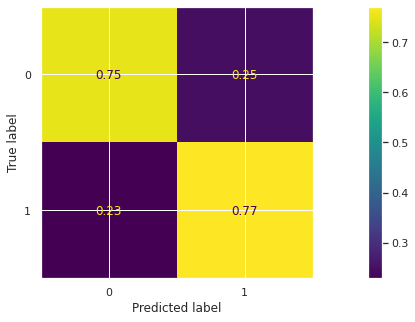

Test: 


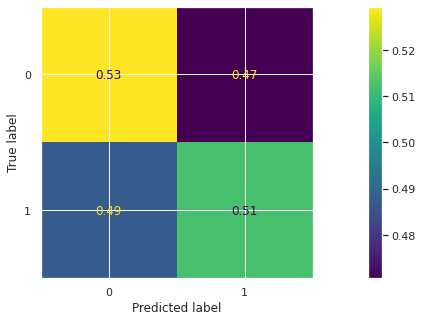

In [ ]:
y_train_predict = arbol_ejemplo.predict(df_train[feat])
y_test_predict = arbol_ejemplo.predict(df_test[feat])

print("Train: ") 
ConfusionMatrixDisplay(confusion_matrix(df_train[target], 
                                        y_train_predict, 
                                        normalize='true')).plot()
plt.show()

print("Test: ")
ConfusionMatrixDisplay(confusion_matrix(df_test[target], 
                                        y_test_predict, 
                                        normalize='true')).plot()
plt.show()

# 07 - Validate Strategy

In [ ]:
horizon

20

In [ ]:
X = 100
comision_entrada = 0.001

i = 0
j = i + horizon

while j < len(timestamps_test):
  
  ti = timestamps_test[i]
  tj = timestamps_test[j]
  
  # Choose coin
  df_i = df.loc[df['Timestamp']==ti, timestamp+coins+targets]
  df_i['score'] = [score[1] for score in arbol_ejemplo.predict_proba(df.loc[df['Timestamp']==ti, feat])]
  df_i = df_i.sort_values('score', ascending=False)
  coin_i = df_i['Crypto'].iloc[0]

  # Buy
  evolucion = df_i['TARGET_num_26'].iloc[0]
  print("Compro ", X, " de ", coin_i, " a las ", ti)
  print(evolucion)
  X = X * (1-comision_entrada) * evolucion
  print("Obtengo ", X, " cuando vendo a las ", tj)
  print()
  print()

  i = j
  j = i + horizon

Compro  100  de  DOT  a las  2022-03-19T21:15:45.000000000
1.00231509584914
Obtengo  100.13127807532909  cuando vendo a las  2022-03-19T21:30:45.000000000


Compro  100.13127807532909  de  LUNA  a las  2022-03-19T21:30:45.000000000
0.9933739333201504
Obtengo  99.36833374851335  cuando vendo a las  2022-03-19T21:45:45.000000000


Compro  99.36833374851335  de  LUNA  a las  2022-03-19T21:45:45.000000000
0.9935207713810749
Obtengo  98.6257790930784  cuando vendo a las  2022-03-19T22:00:45.000000000


Compro  98.6257790930784  de  DOT  a las  2022-03-19T22:00:45.000000000
0.9836956887069218
Obtengo  96.92073593553327  cuando vendo a las  2022-03-19T22:16:30.000000000


Compro  96.92073593553327  de  ETH  a las  2022-03-19T22:16:30.000000000
1.0021792962000255
Obtengo  97.03482297213421  cuando vendo a las  2022-03-19T22:31:30.000000000


Compro  97.03482297213421  de  DOGE  a las  2022-03-19T22:31:30.000000000
1.0021286042716726
Obtengo  97.14413033910287  cuando vendo a las  2022-03-19T22